# First Data Exploration

Different from what our linear sketch of the "typical data science workflow" might suggest, it is generally not at a single moment that we inspect our data. Instead, we inspect our data frequently, with varying focus and depths.

In the previous sections, we saw that the collection and technical handling (e.g., importing) of data already includes a certain degree of data inspection. Then, during data cleaning we had to look closely at what is in the data and what might be missing. Now, we want to take the next step, which is often done by doing basic statistics and other quick data explorations. A good data exploration phase is like getting a quick snapshot of the data's characteristics, anomalies, patterns, and relationships. This foundational step often happens immediately after or even during the data acquisition and cleaning phases.

## Statistical Measures

A comprehensive understanding of the data often starts with basic statistical measures. These measures provide concise summaries, allowing data scientists to quickly grasp main tendencies and dispersions in the dataset. Many of you will (hopefully) already know many of the measures listed in this chapter, so the following is mostly meant as a quick refresher. For those of you who feel lost when it comes to basic statistics, it would make sense to invest some more time to gain a solid foundation of basic statistics. Luckily, there are many books, tutorials, and courses on this matter, for instance the [w3schools website](https://www.w3schools.com/statistics/index.php).

### Measures of Central Tendency
These are quintessential in understanding where the 'center' of our data lies.

**Mean (Arithmetic Mean)**: The arithmetic mean is calculated as the sum of all values divided by the number of values. It's a common measure to determine the central value in a dataset. Mathematically, if $X$ is a dataset with $n$ values, the mean $\mu$ is calculated as:
$$
\mu=\frac{1}{n}\sum_{i=1}^n x_i
$$

**Median**: The median is the middle value of an ordered dataset, separating the higher and lower half. If the dataset has an odd number of observations, the median is the middle number. If there's an even number, it's the average of the two middle numbers.

**Mode**: Represents the value that appears most frequently in a dataset. Datasets can have one mode, more than one mode, or no mode at all.

### Quantiles
They segment the data into intervals that encompass equal fractions. Some of the most common forms of such quantiles are:

- **Median**: Also known as the 0.5-Quantile, representing the 50th percentile.
- **Quartile**: Segments the data into 4 equal parts.
- **Deciles**: Segments the data into 10 equal parts, marking every 10th percentile.
- **Percentiles**: Denotes specific positions in a data set divided into 100 equal parts.

### Measures of Spread
While central tendency gives an overview of the data's central point, measures of spread describe how much the data tends to deviate from that point.

**Standard Deviation (STD)**: It quantifies the dataset's variation. A low standard deviation means that values are close to the mean, while a high standard deviation indicates that values are spread out over a wider range.
$$
\sigma=\frac{1}{n}\sum_{i=1}^n (x_i−\mu)^2
$$

**Interquartile Range**: Represents the range between the first (25th percentile) and third quartiles (75th percentile).
**Range**: It’s the most straightforward measure of spread and is calculated as the difference between the maximum and minimum values in the dataset.
**Variance**: The average of the squared differences from the mean, often denoted as σ2σ2.

---

### Exercise: Understanding Statistics in a Practical Scenario

Consider the 3rd semester of Media Informatics: The average age (mean) of the students = 22.7 years Standard Deviation (STD) = 2.1 years

Try to answer the following questions:

1. Given the mean and standard deviation, is it probable for there to be students in the 3rd semester of Media Informatics who are older than 40 years?
2. Based on the mean and standard deviation, what would be the estimated minimum and maximum age of the students?
3. Based on the mean, are most students above or below 22.7 years of age?

---

Below is a quick summary of the measures discussed:

| Measures                   | Description                                                  | Nominal | Ordinal | Quantitative | Accounts for All Values | Sensitive to Outliers |
| -------------------------- | ------------------------------------------------------------ | :-----: | :-----: | :----------: | :---------------------: | :-------------------: |
| **Mode**                   | Most frequent value                                          |    x    |    x    |      x       |                         |                       |
| **Median**                 | Central value with equal numbers of data points above and below |         |    x    |      x       |                         |                       |
| **Mean (Arithmetic Mean)** | Average value                                                |         |         |      x       |            x            |           x           |
| **Geometric Mean**         | Average of growth rates; multiplicatively linked             |         |         |      x       |            x            |           x           |
| **Harmonic Mean**          | Average of fractions with a constant denominator or a special case of weighted arithmetic mean |         |         |      x       |            x            |           x           |
| **Quantile / Quartile**    | Value below which a specified percentage of observations fall |         |         |      x       |                         |                       |
| **Minimum / Maximum**      | Smallest and largest values respectively                     |         |    x    |      x       |                         |           x           |



## Statistical Measures and Distributions

Let us look at some distributions and their statistical measures. In the following Python code cells we will import the required libraries and define a simple plotting function for the task.

In [2]:
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import squarify

# Set the ggplot style
plt.style.use("ggplot")

For later use we define a `plot_dist` function which can display a distribution as well as the mean and median values.

In [3]:
def plot_dist(
    data,
    bins=30,
    add=["mean"],
    lower_bound=None, upper_bound=None, 
    figsize=(8, 6)
):
    """Enhanced plotting function to display distributions with statistics annotations,
    with options to restrict the histogram's bounds.

    Parameters:
        data (array-like): The full dataset used for statistical computations.
        bins (int): Number of histogram bins.
        add (list): List of statistics to annotate. Options: "mean", "median".
        lower_bound (float, optional): Lower bound for the histogram plot.
        upper_bound (float, optional): Upper bound for the histogram plot.
        figsize (tuple): The figure size.
    """
    def add_stat(value, height, name, color="crimson"):
        """Draw a vertical line at the statistic's value"""
        ax.axvline(value, color=color, linestyle='--', linewidth=2)

        # Check if the text is going out of bounds on the right
        if value > ax.get_xlim()[1] * 0.95:
            value = ax.get_xlim()[1] * 0.95
        ax.text(value, height, f" {name}: {value:.2f}",
                color=color,
                verticalalignment='center')

    # For histogram, only use data within the provided bounds.
    data_hist = data
    if lower_bound is not None:
        data_hist = data_hist[data_hist >= lower_bound]
    if upper_bound is not None:
        data_hist = data_hist[data_hist <= upper_bound]

    # Create the histogram using the bounded data.
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    counts, bins, patches = ax.hist(data_hist, bins=bins, rwidth=0.8,
                                    color="steelblue", alpha=0.75)

    max_height = np.max(counts)

    # Compute statistics on the full data.
    if "mean" in add:
        mean_value = np.mean(data)
        add_stat(mean_value, 0.9 * max_height, "mean")
    if "median" in add:
        median_value = np.median(data)
        add_stat(median_value, 0.8 * max_height, "median", "purple")

    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution with Statistical Annotations')
    #plt.show()

### Symmetric Distribution

Symmetric distributions are those where values are distributed in a way that the shape on one side of the centerline mirrors the shape on the other. In other words, the left half of the distribution is a mirror image of the right half. One of the key properties of a symmetric distribution is that the mean and median will be the same, or very close.

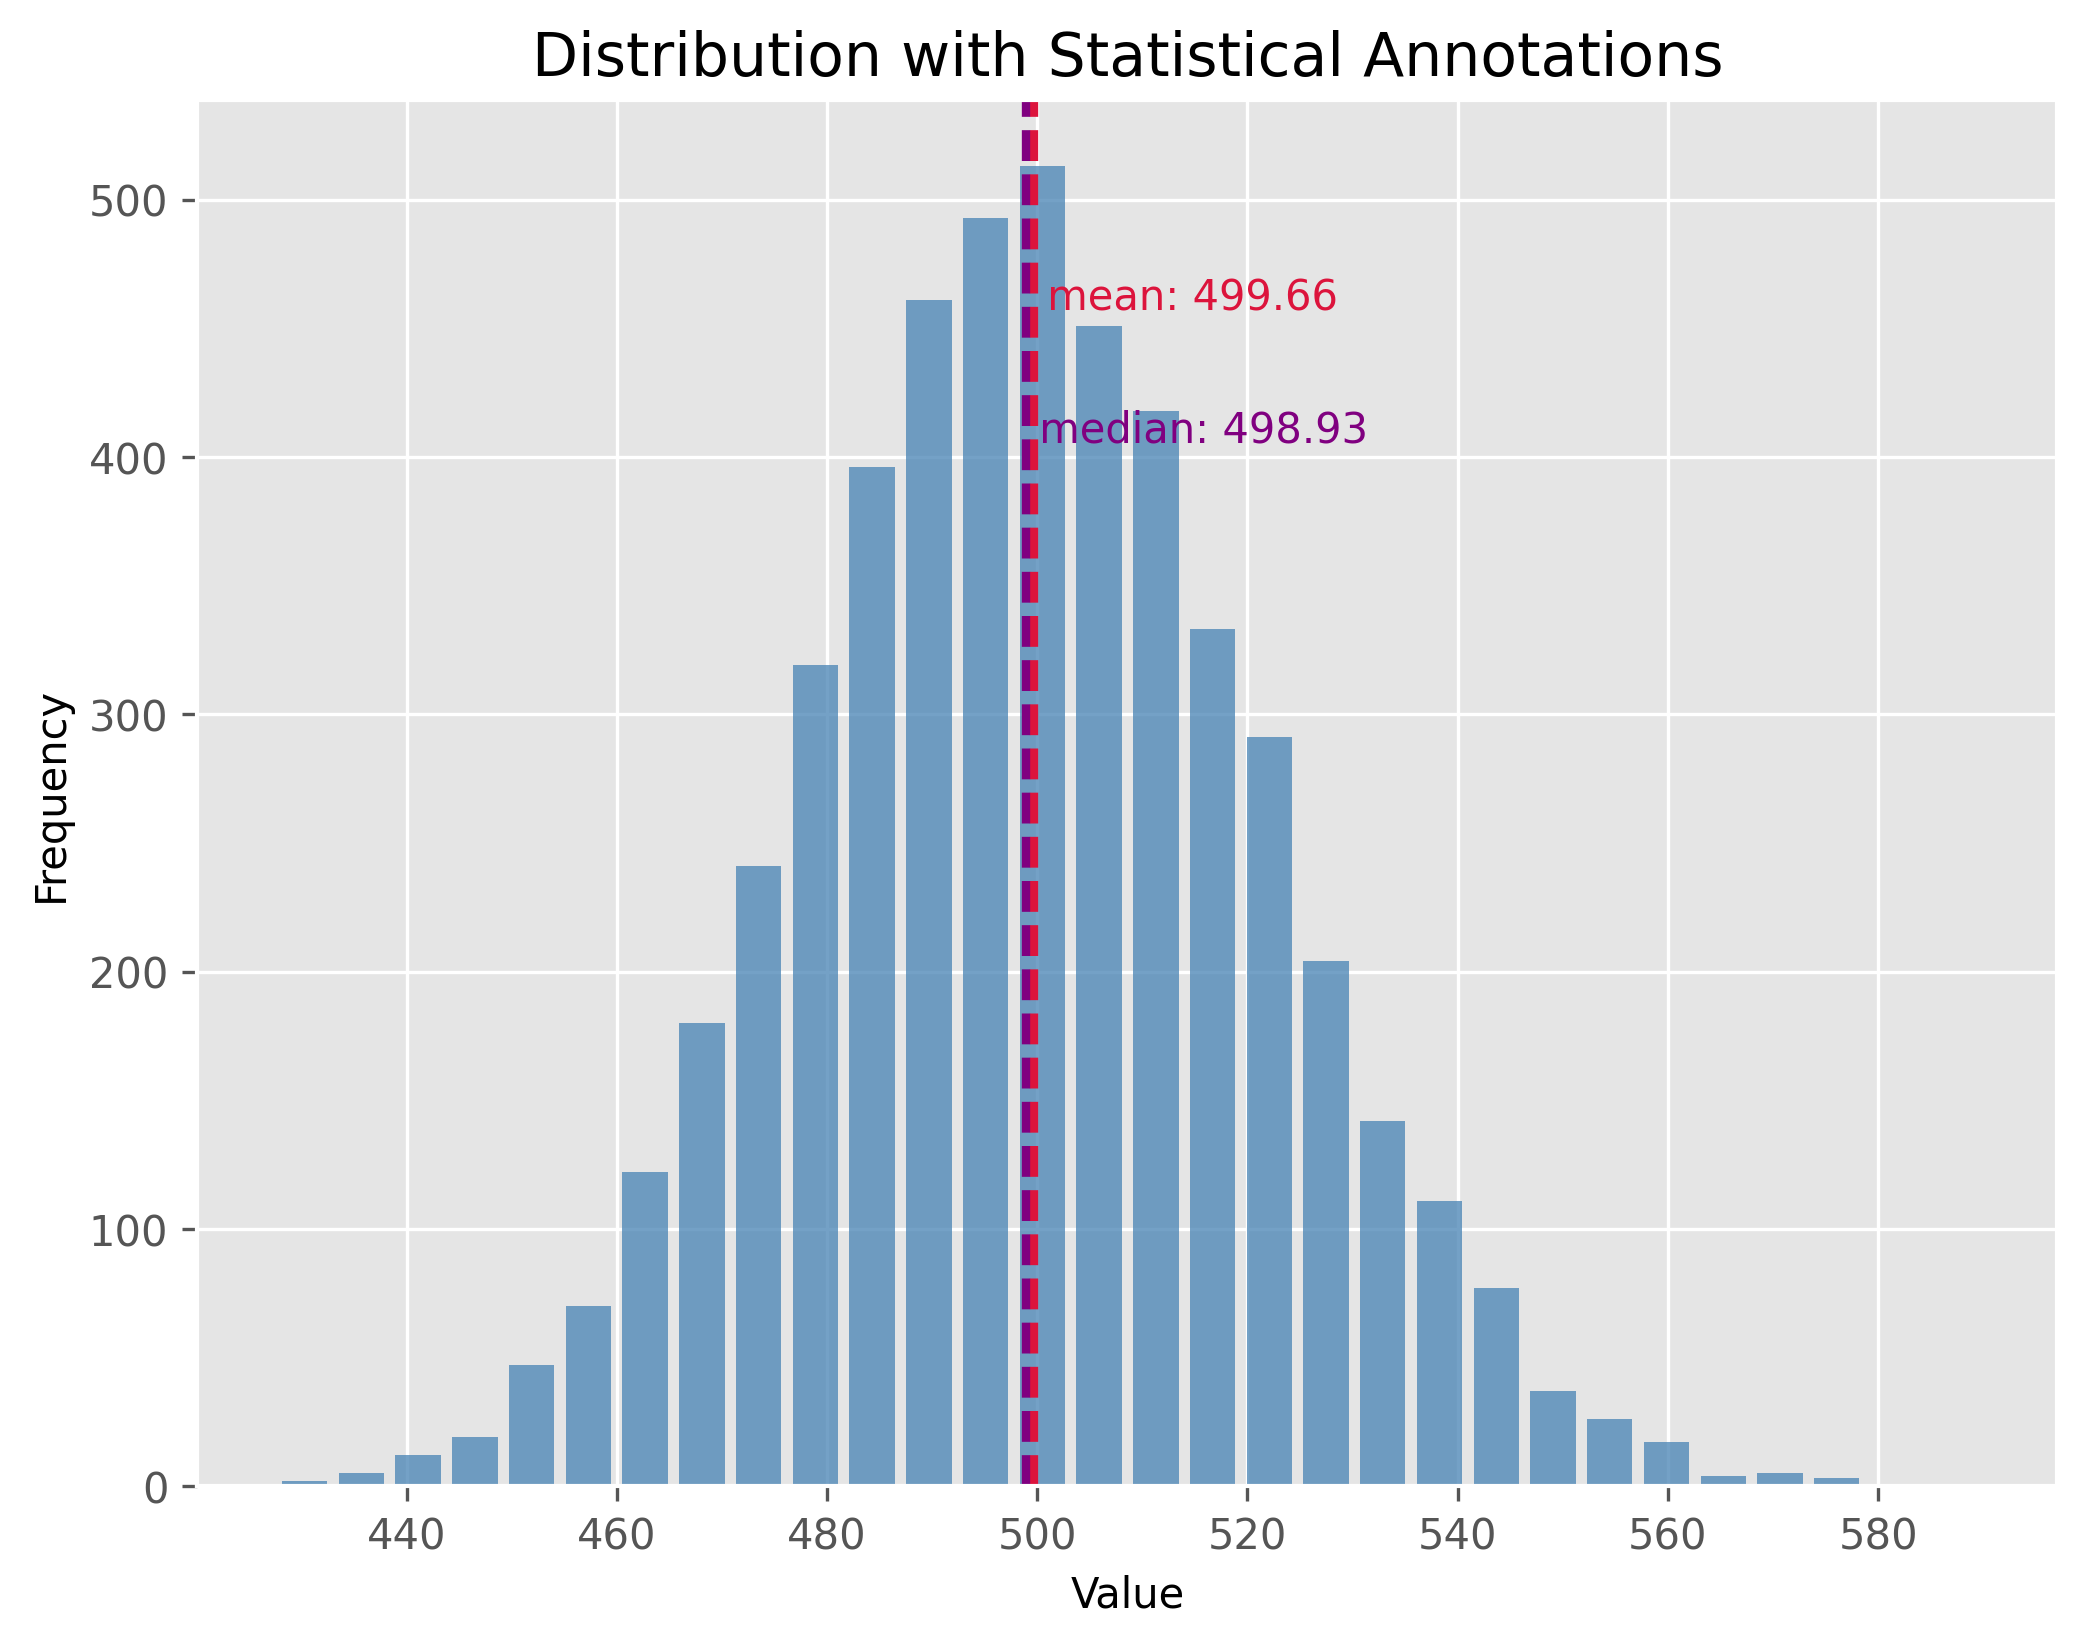

In [54]:
np.random.seed(0)
data = np.random.gamma(500, 1, 5000)
plot_dist(data, 30, ["mean", "median"])

### Non-symmetric Distributions

In reality, most of the data we encounter tends to be non-symmetric. These distributions don't exhibit mirror-like symmetry around their center. It is important to note here, especially for non-symmetric distributions, the mean might not necessarily represent the "center" of the data.

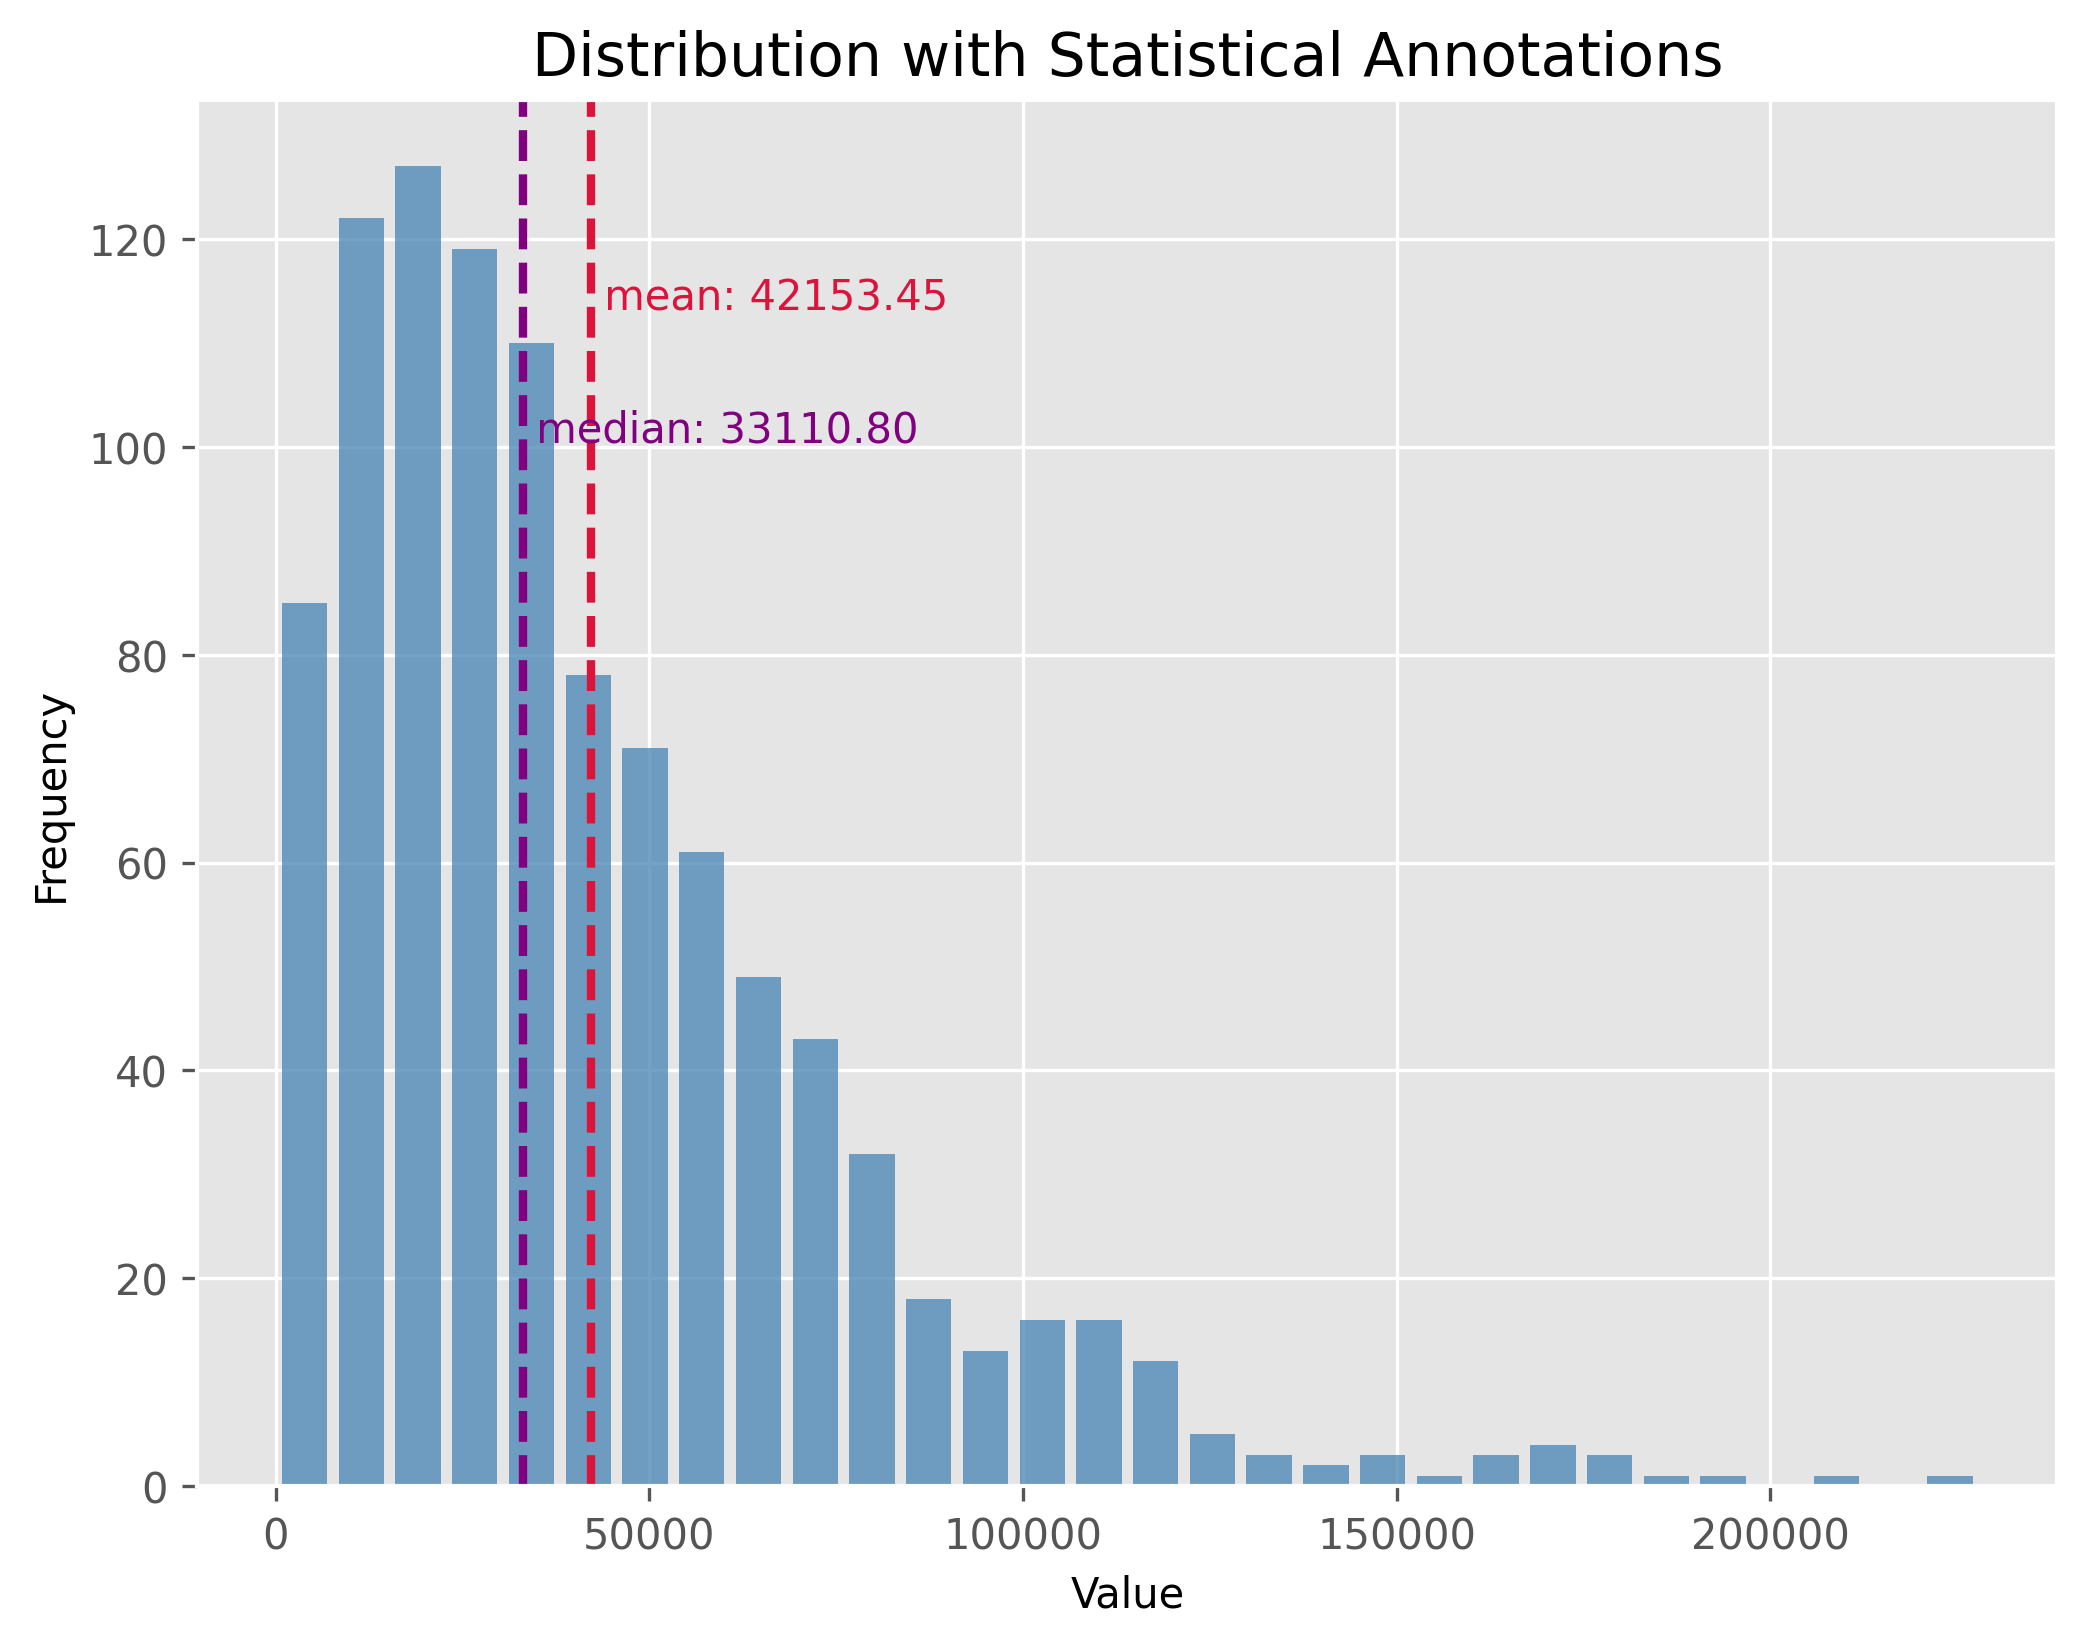

In [7]:
data = np.random.gamma(1.6, 26000, 1000)
plot_dist(data, 30, ["mean", "median"])

### Distributions with Outliers

Outliers are values that stand apart from the bulk of the data. Their presence can distort our perceptions about the data and can notably skew our mean. It's essential to identify and manage outliers for better statistical interpretations.

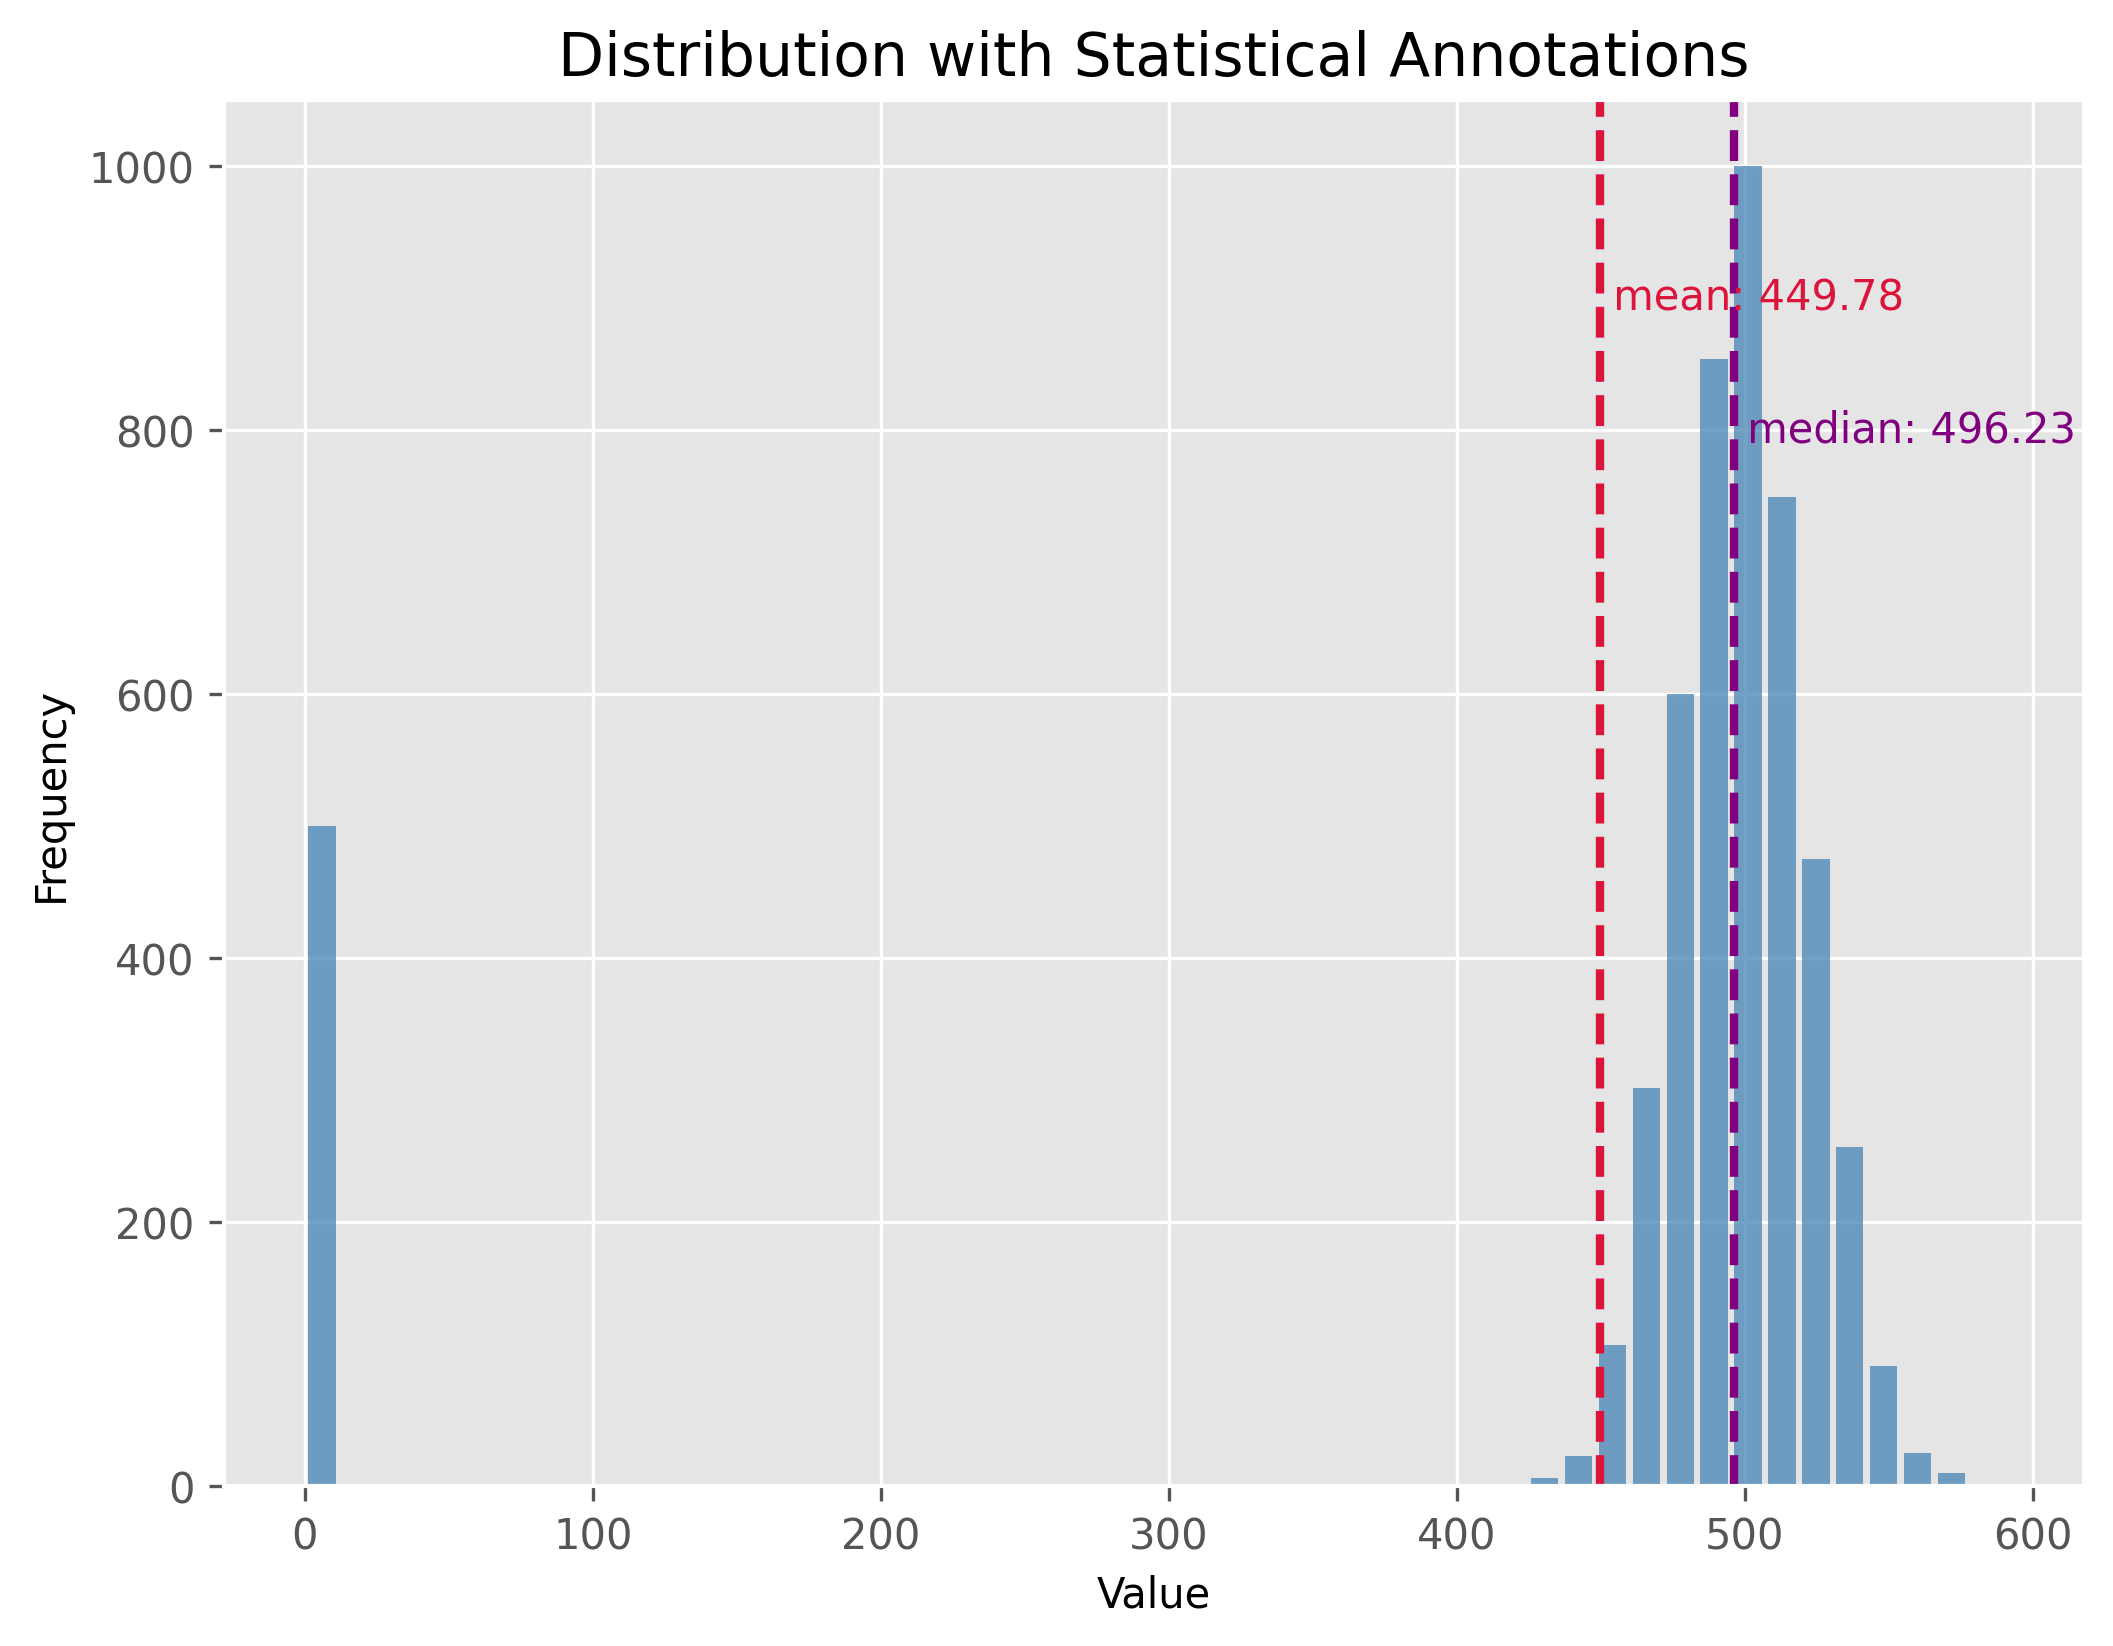

In [9]:
np.random.seed(0)
data = np.random.gamma(500, 1, 5000)
data[:500] = 0
plot_dist(data, 50, ["mean", "median"])

If you look at the distribution plot with the median and the mean: Which of the two measures is better in this case (and why)?

### Mixed Distributions

At times, our dataset may not belong to a single type of distribution. Instead, it may be the result of a mix of two or more underlying distributions. This phenomenon is observed in mixed distributions. Recognizing and understanding the different underlying distributions can be crucial for analysis.

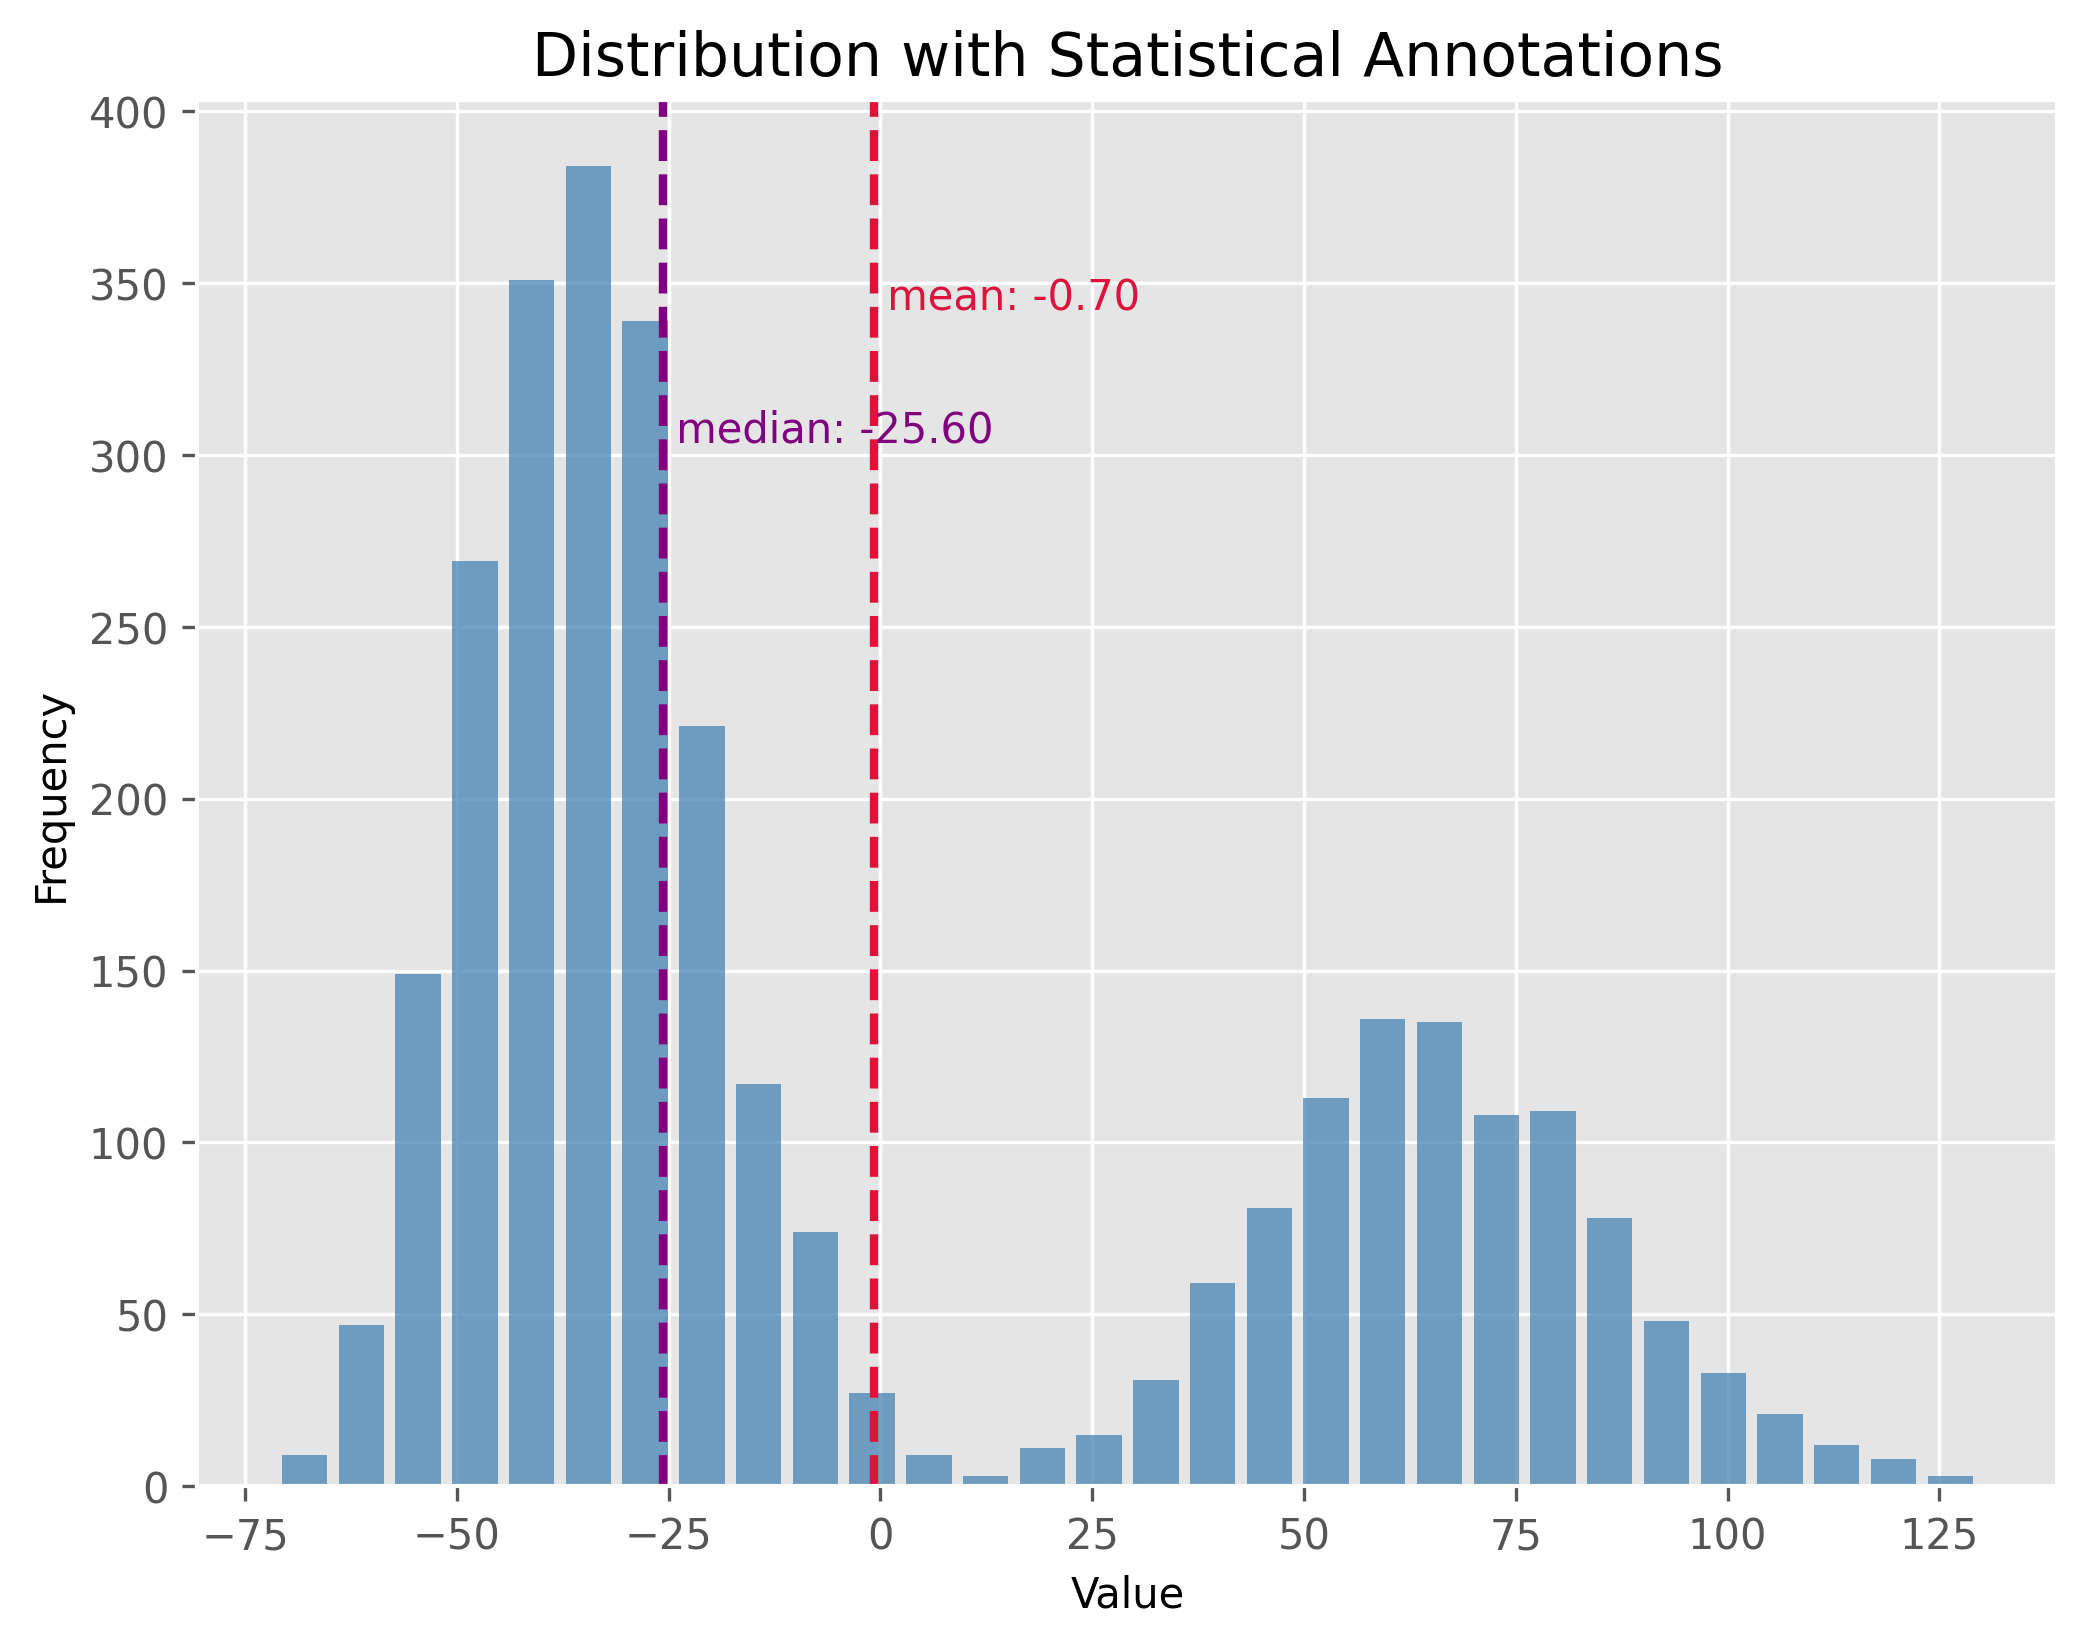

In [10]:
np.random.seed(0)
data1 = np.random.gamma(50, 2, 2000)
data2 = np.random.gamma(100, 2, 1000)
data = np.concatenate((data1, data2)) - 134

plot_dist(data, 30, ["mean", "median"])

Here again: If you look at the distribution plot with the median and the mean, which of the two measures is better in this case (and why)?

### Statistical Measures

After observing the distributions, let's also calculate key statistical measures and see what insights they provide regarding the distribution's characteristics.

In [11]:
print(np.std(data))
print(np.min(data), np.max(data))
print(np.quantile(data, 0.5))
print(np.quantile(data, 0.9))
print(np.percentile(data, [25 ,75]))

50.09713754299179
-71.30263005114779 129.6311878602093
-25.604183317689994
76.81243703053997
[-39.37861049  52.79716049]


## Statistical dispersion

Statistical dispersion refers to the spread or variability of a dataset. It helps to understand the extent to which individual data points deviate from the mean. While two distributions might have similar centers (mean or median), their characteristics could differ considerably in terms of spread. For instance, one might be tightly clustered around the mean, whereas the other might be more spread out.

Dispersion can be illustrated with two distributions that have the same center (mean) but different standard deviations. In the following examples, both distributions are centered at 100, but they have standard deviations of 15 and 1.5, respectively. The standard deviation (often referred to as "STD") is a measure that tells us how spread out the numbers in a distribution are.

A higher standard deviation indicates that the data points tend to be farther from the mean, while a smaller standard deviation suggests that they are clustered closely around the mean.

STD: 14.81


(52.0, 148.0)

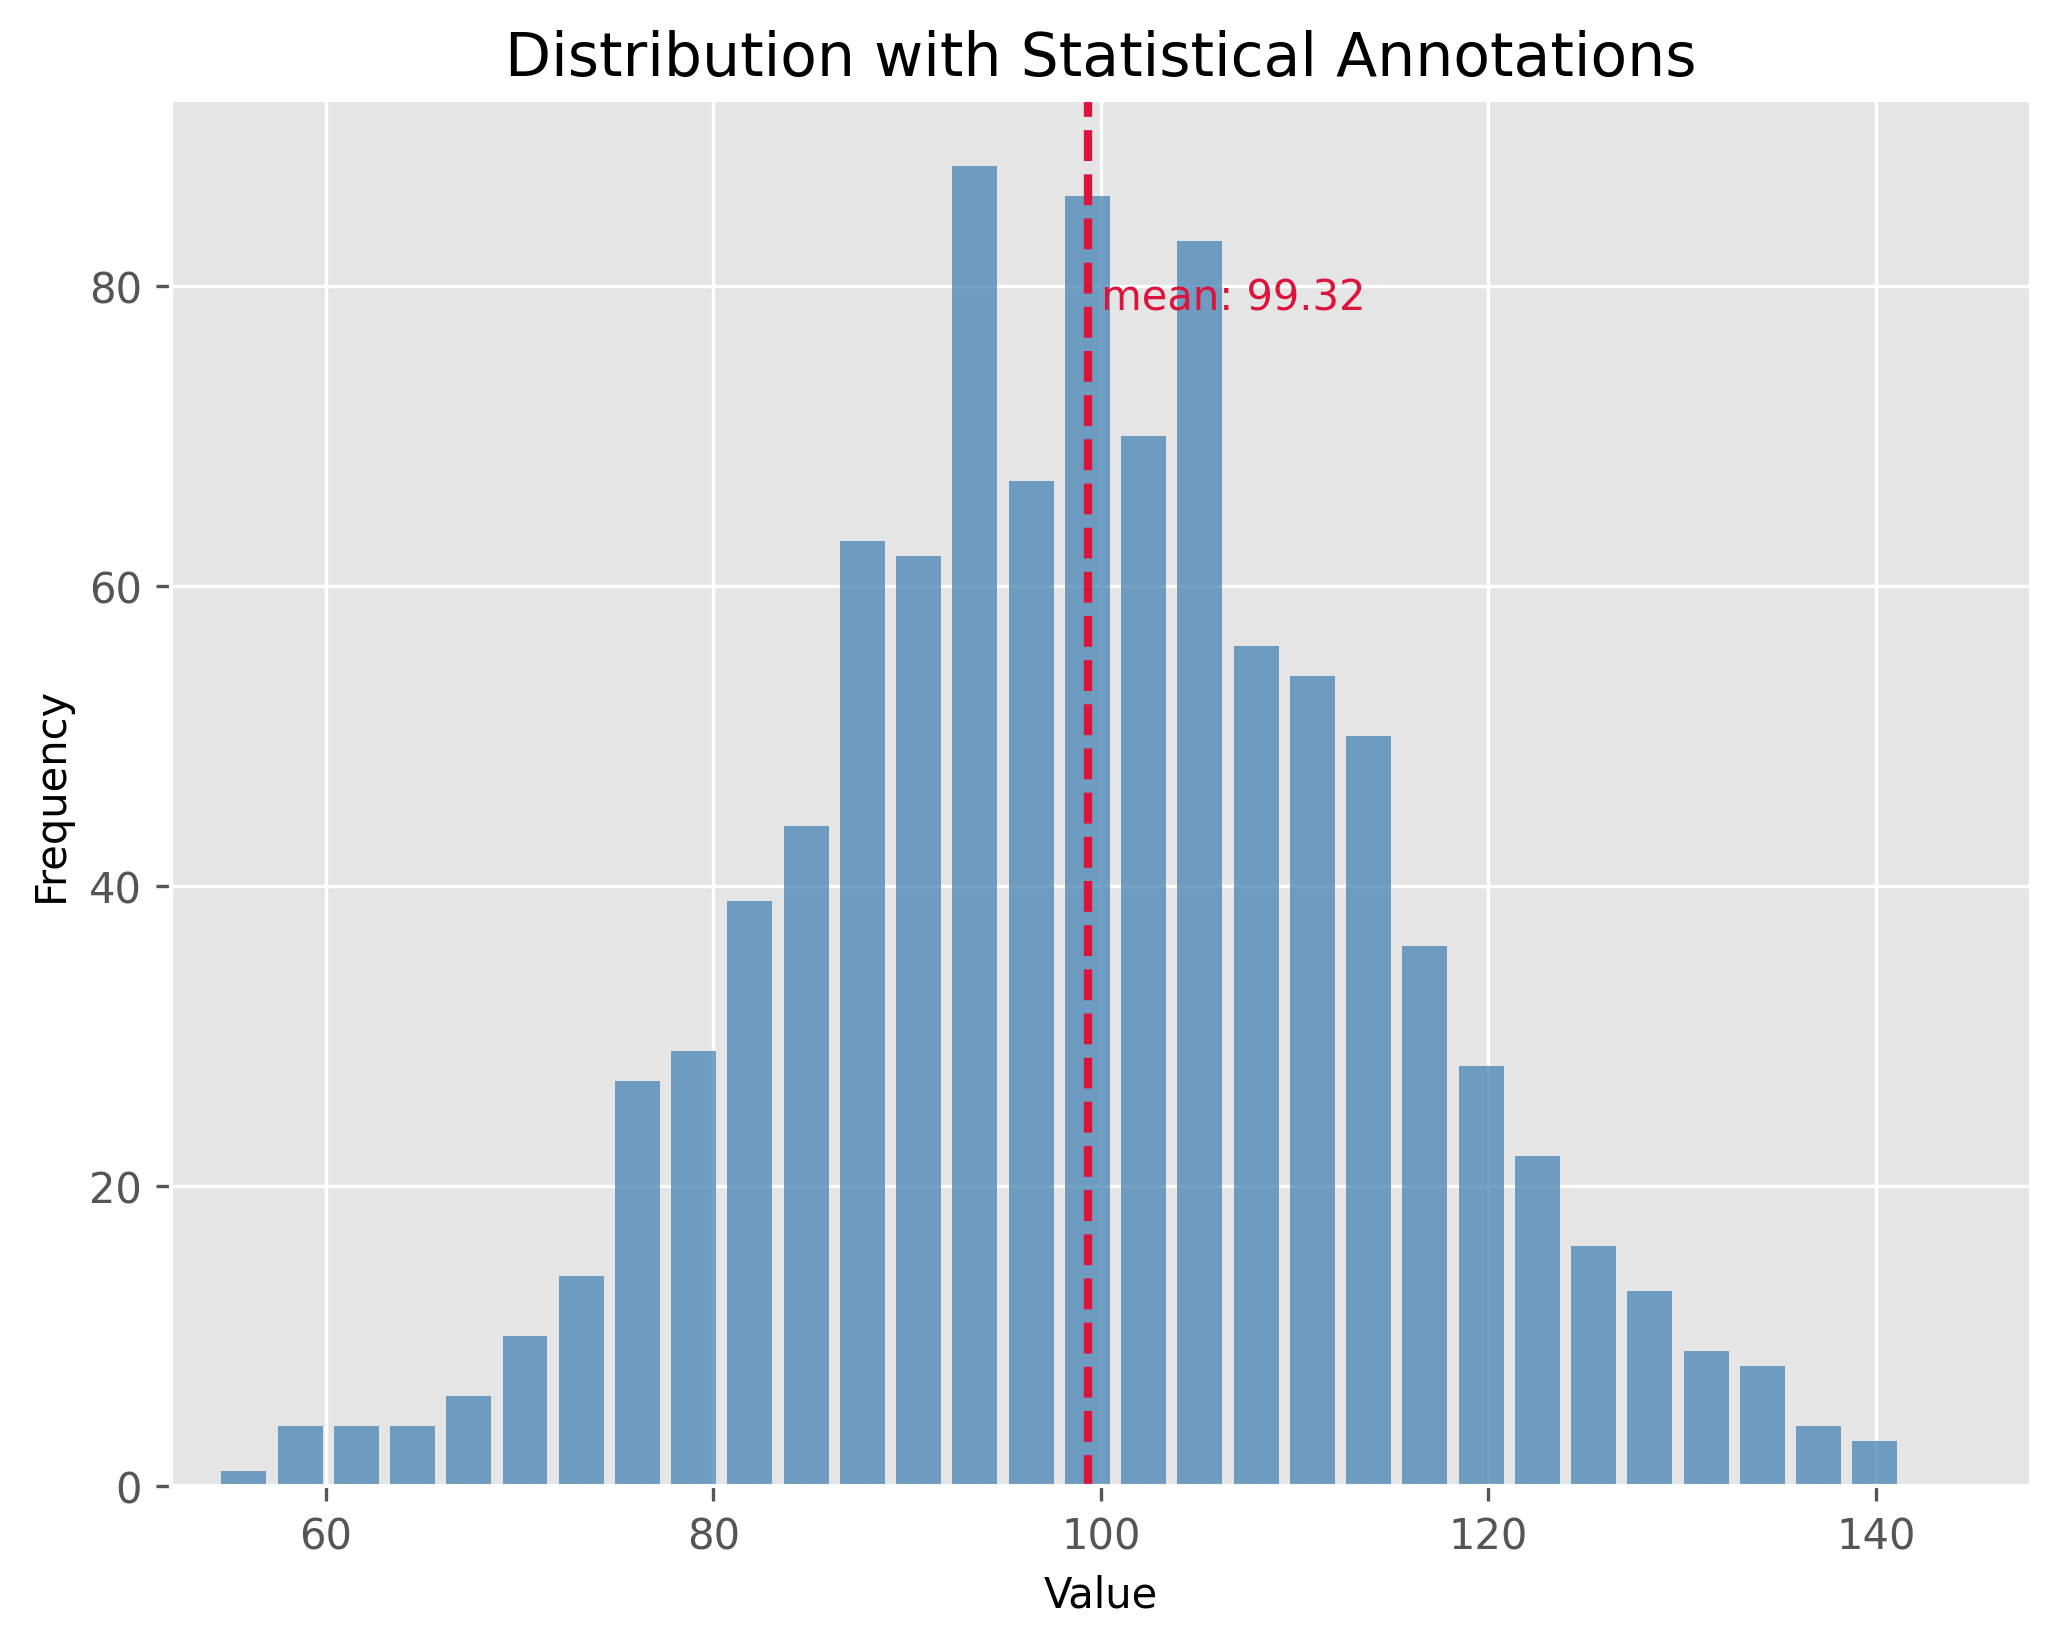

In [12]:
np.random.seed(0)
data = np.random.normal(100, 15, 1000)

plot_dist(data, 30, ["mean"])
print(f"STD: {np.std(data):.2f}")
plt.xlim(52, 148)

The plot above showcases a normal distribution with a mean of 100 and a standard deviation of 15. The data points are spread relatively far from the mean, resulting in a wider bell shape.

STD: 1.47


(52.0, 148.0)

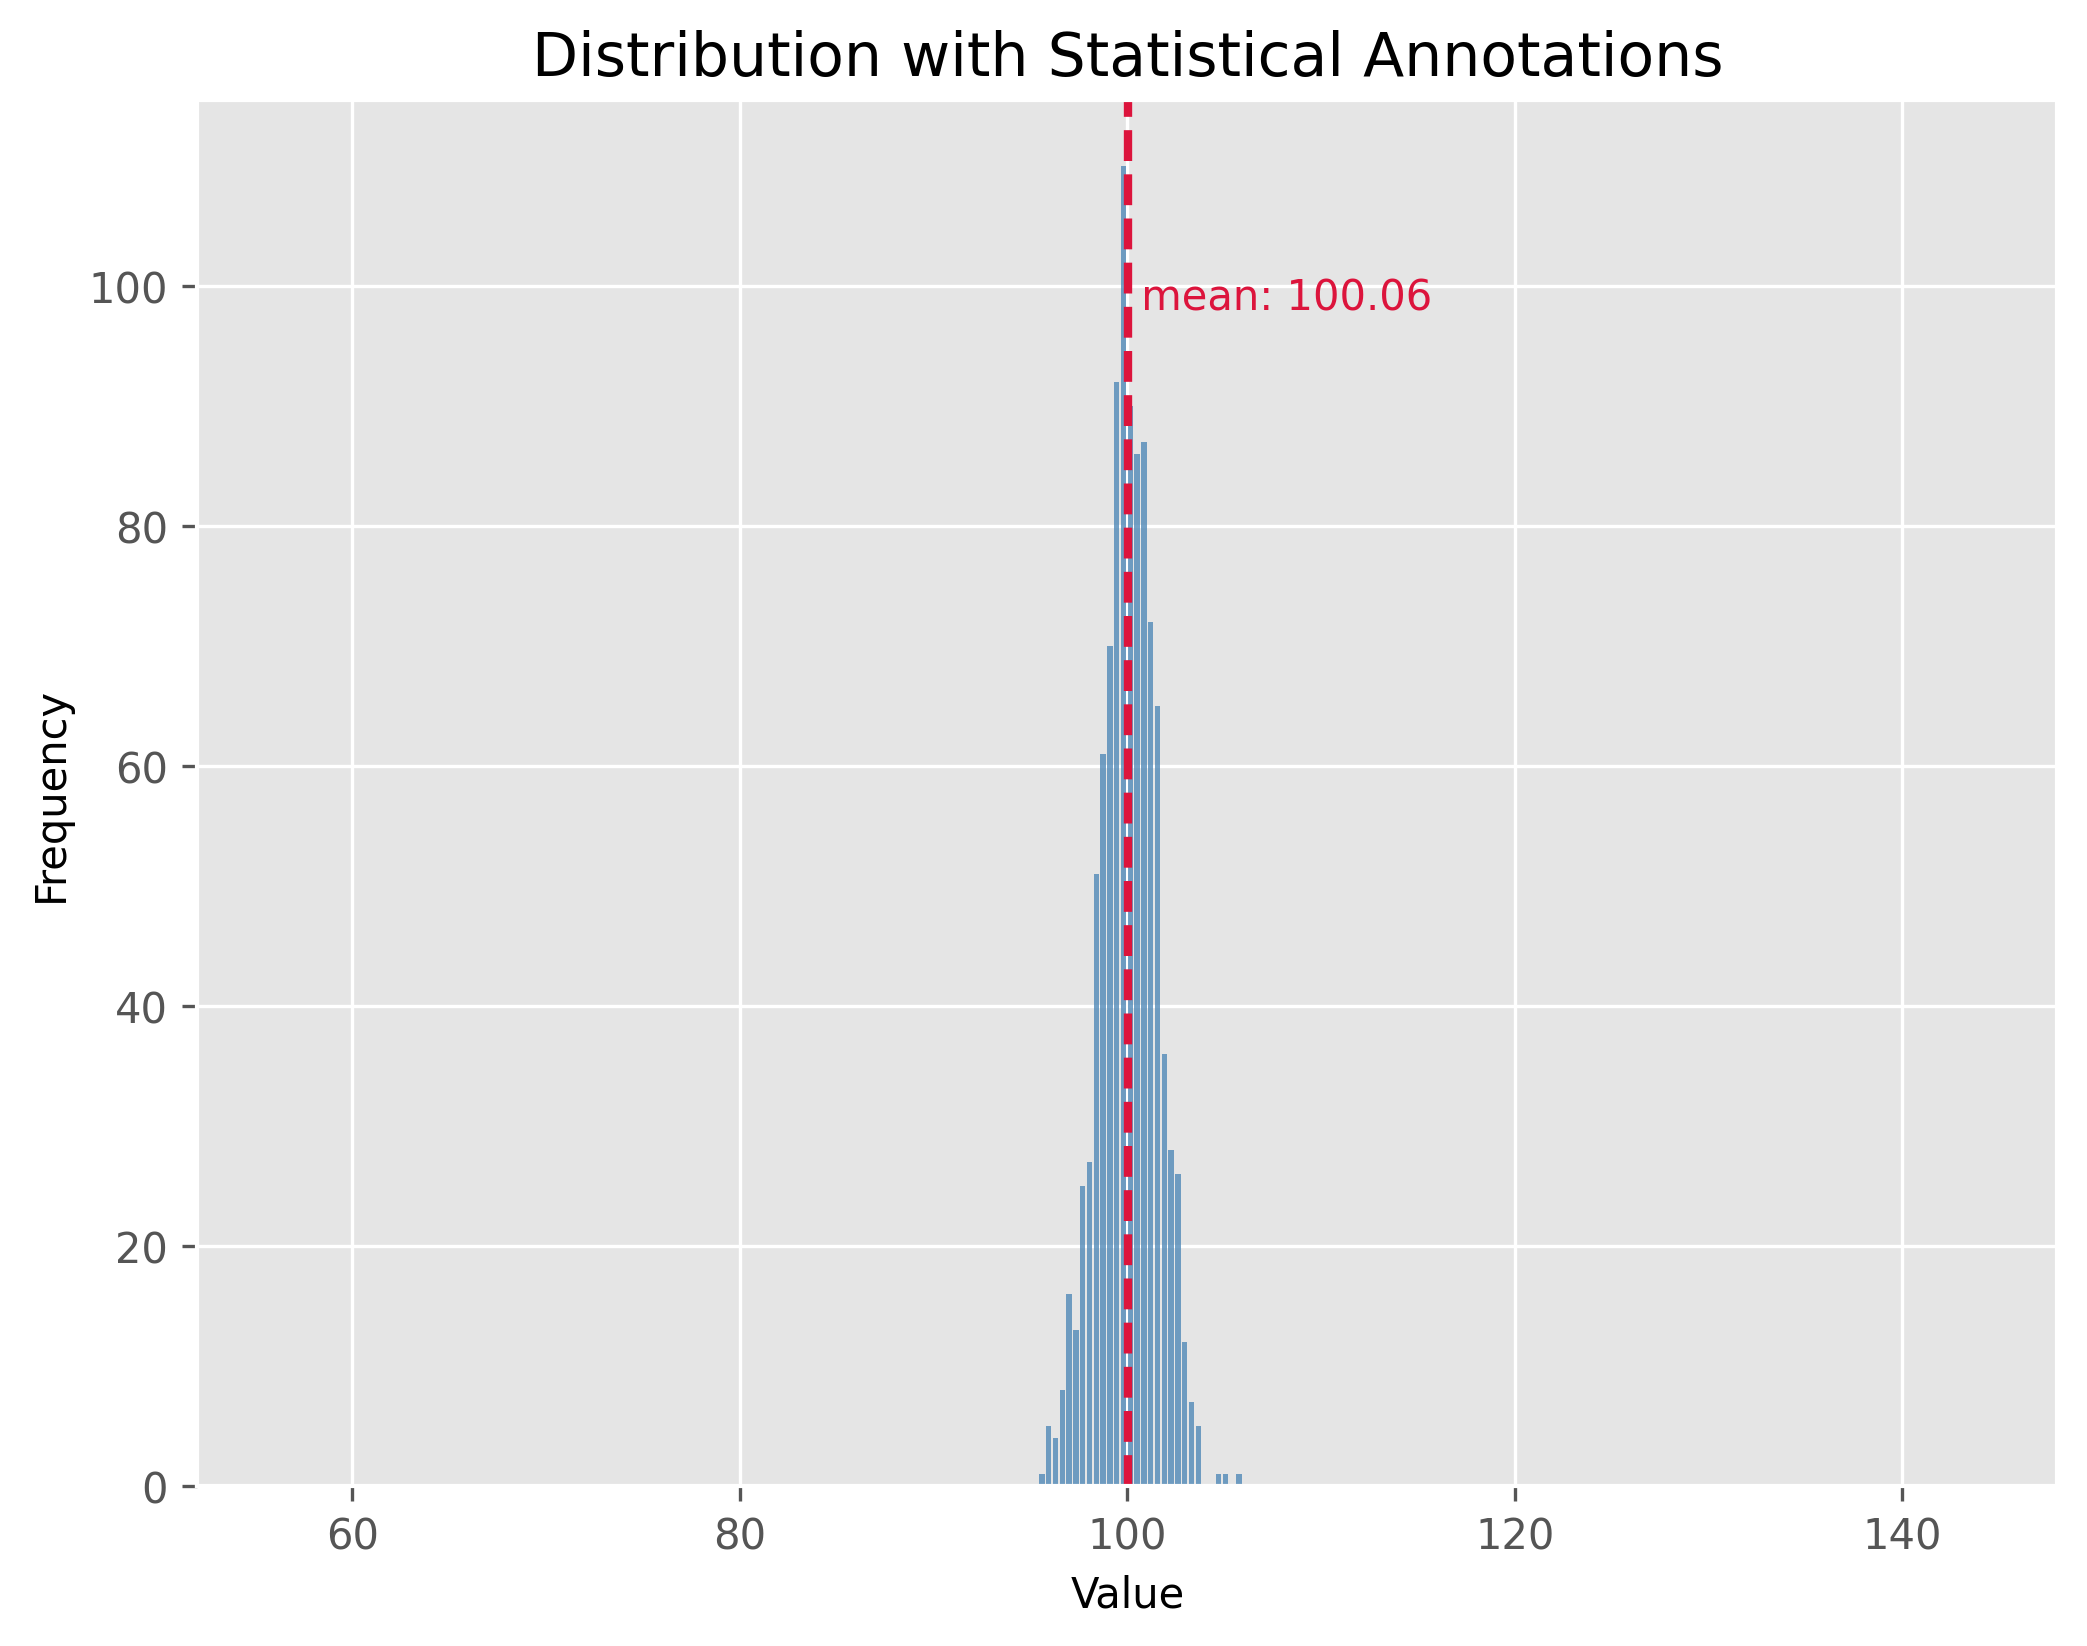

In [13]:
np.random.seed(1)
data = np.random.normal(100, 1.5, 1000)

plot_dist(data, 30, ["mean"])
print(f"STD: {np.std(data):.2f}")
plt.xlim(52, 148)

In contrast, the second plot demonstrates a distribution with the same mean of 100 but with a much smaller standard deviation of 1.5. This causes the data to be tightly clustered around the mean, making the bell shape much narrower.

By comparing the two plots, we observe the significance of the standard deviation in understanding the distribution's spread. While both distributions share the same center, their spreads are vastly different, and recognizing this difference is crucial in many statistical analyses and applications.

## What can statistical measures do (and what not)?
Statistical measures such as *mean* or *median*, or dispersion measures such as *standard deviation* or *range* often allow us to get a **very fast** first impression of a dataset. But we have to be careful not to put too much weight on those fairly basic statistical values.

In [14]:
filename = r"https://raw.githubusercontent.com/florian-huber/data_science_course/a595bd6b19565cedff0c3917012be6e05223f7fb/datasets/datasaurus.csv"

# read data
data = pd.read_csv(filename)

# prepare data
new_names = "ABCDEFGHIJKLMNOP"
convert_names = {x: new_names[i] for i, x in enumerate(data["dataset"].unique())}

data["dataset"] = data["dataset"].apply(lambda x: convert_names[x])

datasets = []
for value in data["dataset"].unique():
    mask = data["dataset"] == value
    datasets.append(data[mask].drop(columns=["dataset"])) 

### First Data Exploration (using basic statistics)
In the code cell above we imported a dataset that consists of 14 different subsets ("A" to "M"). Each data point belongs to only one of those subsets and otherwise consists of only two numerical features: **x** and **y** which can be thought of as a 2D position. 

In [15]:
data.head(3)

dataset        x        y
0       A  55.3846  97.1795
1       A  51.5385  96.0256
2       A  46.1538  94.4872

We can use Pandas and its `groupby` method to quickly get several important statistical measures on all 14 subsets.

In [16]:
cols = [("x", "count"), ("x", "mean"), ("x", "std"),
       ("y", "count"), ("y", "mean"), ("y", "std")]
data.groupby('dataset').describe()[cols]

x                            y                      
         count       mean        std  count       mean        std
dataset                                                          
A        142.0  54.263273  16.765142  142.0  47.832253  26.935403
B        142.0  54.266100  16.769825  142.0  47.834721  26.939743
C        142.0  54.261442  16.765898  142.0  47.830252  26.939876
D        142.0  54.269927  16.769959  142.0  47.836988  26.937684
E        142.0  54.260150  16.769958  142.0  47.839717  26.930002
F        142.0  54.267341  16.768959  142.0  47.839545  26.930275
G        142.0  54.268805  16.766704  142.0  47.835450  26.939998
H        142.0  54.260303  16.767735  142.0  47.839829  26.930192
I        142.0  54.267320  16.760013  142.0  47.837717  26.930036
J        142.0  54.268730  16.769239  142.0  47.830823  26.935727
K        142.0  54.265882  16.768853  142.0  47.831496  26.938608
L        142.0  54.267849  16.766759  142.0  47.835896  26.936105
M        142.0  54.266916  16.770000  142.0  47.831602  26.937902

### Mini-Exercise: What do you think?
If you compare the mean and standard deviation (std) values for all 14 datasets (A to P), what do you expect them to look like? There is 142 datapoints in each subset. Will the datapoints of each subset be distributed similarly or not?

### Solution

There is only one good way to find out and that is to inspect the data!
Try, for instance, to run the following:

```python
sb.relplot(x="x", y="y", col="dataset", kind="scatter", data=data, col_wrap=4)
```

I won't spoil it here right away, but what this dataset should illustrate once and for all is that basic statistical measures are a good starting point. But they often don't tell us enough about our data! By the way, this dataset is called the **datasaurus** {cite}`matejka_same_2017`.

## Comparing Distributions Visually

When we analyze a given dataset, one of the most fundamental tasks is understanding the underlying distribution. Especially when dealing with multiple datasets, understanding and comparing their distributions can reveal patterns, outliers, and other crucial insights. As we just saw in the above exercise, visualization tools play an invaluable role in this exploration because they can tell us much more than a few statistical measures, such as mean, median, or standard deviation alone. Here's a deeper look at some popular techniques for visual data representation of distributions:

1. **Box Plot**:

   A box plot (or whisker plot) displays a summary of a set of data values. It provides a visual summary of the minimum, first quartile, median, third quartile, and maximum of a dataset.

   - **Pros**:
     - Efficiently represents the data's spread and central tendency.
     - Useful for identifying outliers and comparing distributions across groups.

   - **Cons**:
     - Can be challenging to interpret for those unfamiliar with the plot's elements.
     - It doesn't represent the nuances in distributions; for instance, two very different distributions (like C and D) could have similar box plots.

2. **Strip Plot**:

   A scatter plot where one axis is categorical. It's useful for displaying all items in the dataset.

   - **Pros**:
     - It offers a sense of the density and distribution of data points.
     - Clearly shows individual data points.

   - **Cons**:
     - Can become cluttered and less interpretable with large datasets as points overlap.
     - Doesn't provide summary statistics about the data.

3. **Swarm Plot**:

   Similar to a strip plot where data points are adjusted (or "swarmed") to avoid overlap, giving a clearer representation of the distribution of values.

   - **Pros**:
     - It offers a clearer view of the distribution than strip plots for moderate datasets.
     - Good for visualizing the density of the data.

   - **Cons**:
     - Not suitable for very large datasets as it can become cluttered and slow to render.
     - Like the strip plot, it lacks summary statistics.

4. **Violin Plot**:

   Combines the benefits of both box plots and kernel density plots. It shows the full distribution of the data along with its summary statistics.

   - **Pros**:
     - It offers a detailed view of the data's distribution, including its density.
     - Combines the best of box plots (summary statistics) and density plots (distribution shape).

   - **Cons**:
     - Requires a degree of smoothing, which can be perceived as manipulating or altering the true nature of the data.
     - Can be harder for newcomers to interpret compared to simpler plots.

Using these visualization tools thoughtfully allows us to derive meaningful insights from our data, helping guide our analyses and decision-making.

In [17]:
# create toy data
np.random.seed(0)

data1 = np.random.normal(4, 0.7, 150)
data2 = np.random.normal(1, 0.7, 150)
dataC = np.concatenate((data1, data2))

datasets_test = pd.DataFrame({"A": np.random.gamma(1.6, 2, 300),
                             "B": 0.6 + np.random.exponential(2.2, 300),
                             "C": dataC,
                             "D": np.random.uniform(-1, 5.5, 300)})

Text(0.5, 0.98, 'Different ways to include distribution properties')

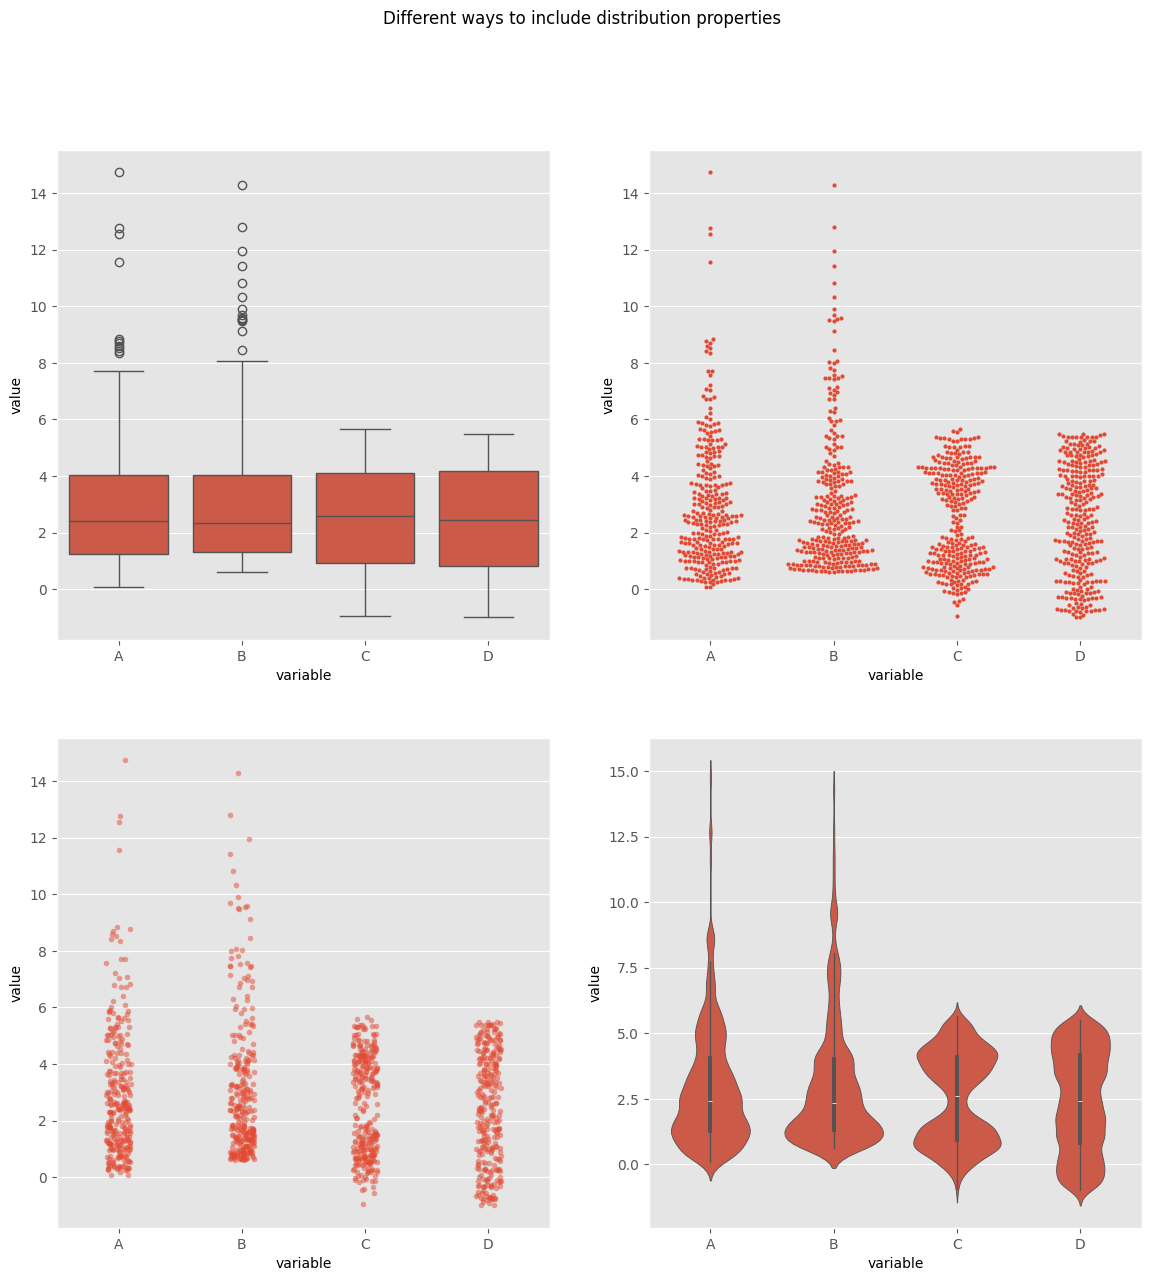

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

sb.boxplot(x="variable", y="value", data=pd.melt(datasets_test),
          ax=ax[0][0])

sb.stripplot(x="variable", y="value", data=pd.melt(datasets_test),
          ax=ax[1][0], alpha=0.5, size=4)

sb.swarmplot(x="variable", y="value", data=pd.melt(datasets_test),
          ax=ax[0][1], size=3)

sb.violinplot(x="variable", y="value", data=pd.melt(datasets_test),
          ax=ax[1][1], bw_method=0.15)  # bw for "bandwidth" controls the degree of smoothing

fig.suptitle("Different ways to include distribution properties")

By utilizing these visualization techniques, we can get a comprehensive understanding of our datasets' distributions and make more informed decisions during analysis.

## Let's talk money

In real life we will come across distributions of all shapes, often non-symmetric. And even though it is considered polite in many cultures to not talk too much about our own wealth and incomes, we all probably know that income and wealth are unlikely to be narrow, symmetric distributions where most people have more or less the same, and earn more or less the same. I will leave the political debates up to you (but secretly do hope to spark some). 

To me, things like wealth and income are good topics to learn about basic statistics. First, because we all know *something* about money and to some extend care about money (even if we say otherwise). And second, because it is full of striking example of skewed distributions. In fact, let me quote Thomas Piketty here {cite}`piketty_capital_2014`:

>  **Wealth is so concentrated that a large segment of society is virtually unaware of its existence.**


Real numbers on incomes in Germany, albeit already evaluated, can be found [here](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Einkommen-Konsum-Lebensbedingungen/Einkommen-Einnahmen-Ausgaben/Publikationen/Downloads-Einkommen/einkommensverteilung-2152606139004.pdf;jsessionid=6E880CBD0BFD0E121C71BCEC21D6971B.live742?__blob=publicationFile).

For raw data requests, you can visit [this site](https://paneldata.org/).

Let's dive into our fictional, but realistic, data. This data is generated based on an actual distribution from Germany in 2024 (see [Link to Statistisches Bundesamt](https://www.destatis.de/DE/Presse/Pressemitteilungen/2025/04/PD25_134_621.html)).

In [58]:
from scipy.stats import invgamma
from scipy.optimize import curve_fit


# Recent income data from Germany (2024) - taken from https://www.destatis.de/DE/Presse/Pressemitteilungen/2025/04/PD25_134_621.html
income_percentiles = pd.DataFrame({
    "percentile": [99, 90, 80, 70, 60, 50, 40, 30, 20, 10],
    "income": [213_286, 97_680, 77_105, 65_843, 58_214, 52_159, 47_244, 42_700, 37_944, 32_526]
})


# Functions to generate fake data following the actual distribution (to produce fake but realistic data)
def fit_invgamma(data_percentiles):
    """
    Fit an inverse gamma distribution to the given income percentiles.
    
    Parameters:
        data_percentiles (pd.DataFrame): DataFrame with columns:
            - 'percentile': Percentile values (e.g., 10, 20, ..., 99)
            - 'income': Income value corresponding to each percentile.
    """
    # Sort the DataFrame in ascending order by percentile.
    df_sorted = data_percentiles.sort_values("percentile")
    
    # Convert percentiles into probabilities (e.g., 10 becomes 0.10).
    probabilities = df_sorted["percentile"].values / 100.0
    incomes = df_sorted["income"].values

    # Define the model function: the inverse gamma quantile (ppf) at probability 'p'.
    def invgamma_ppf(p, a, scale):
        return invgamma.ppf(p, a, scale=scale)

    # Provide an initial guess for [shape, scale]. 
    initial_guess = [2.0, 50000]
    
    # Fit the inverse gamma quantile function to the provided data.
    # We constrain the parameters to be positive.
    params, _ = curve_fit(invgamma_ppf, probabilities, incomes, p0=initial_guess, 
                          bounds=([1e-6, 1e-6], [np.inf, np.inf]))
    
    fitted_shape, fitted_scale = params
    return fitted_shape, fitted_scale

def generate_synthetic_income_data_invgamma(data_percentiles, total_entries=30000):
    """
    Fit an inverse gamma distribution to the provided income percentiles 
    and generate synthetic income data based on the fitted distribution.
    
    Parameters:
        data_percentiles (pd.DataFrame): DataFrame containing two columns:
            'percentile': e.g., 10, 20, …, 99
            'income': Corresponding income values
        total_entries (int): The number of synthetic income data points to generate.
    """
    # Fit the parameters (shape and scale) of the inverse gamma.
    fitted_shape, fitted_scale = fit_invgamma(data_percentiles)
    
    # Generate synthetic income data by sampling from the fitted inverse gamma distribution.
    synthetic_incomes = invgamma.rvs(fitted_shape, scale=fitted_scale, size=total_entries)
    
    return synthetic_incomes, (fitted_shape, fitted_scale)

In [70]:
# Code to generate a simulated income distribution for Germany (2024)
np.random.seed(0)
synthetic_incomes, parameters = generate_synthetic_income_data_invgamma(income_percentiles)
income_simulated = pd.DataFrame(synthetic_incomes / 12, columns=["income"])  # Set to monthly income

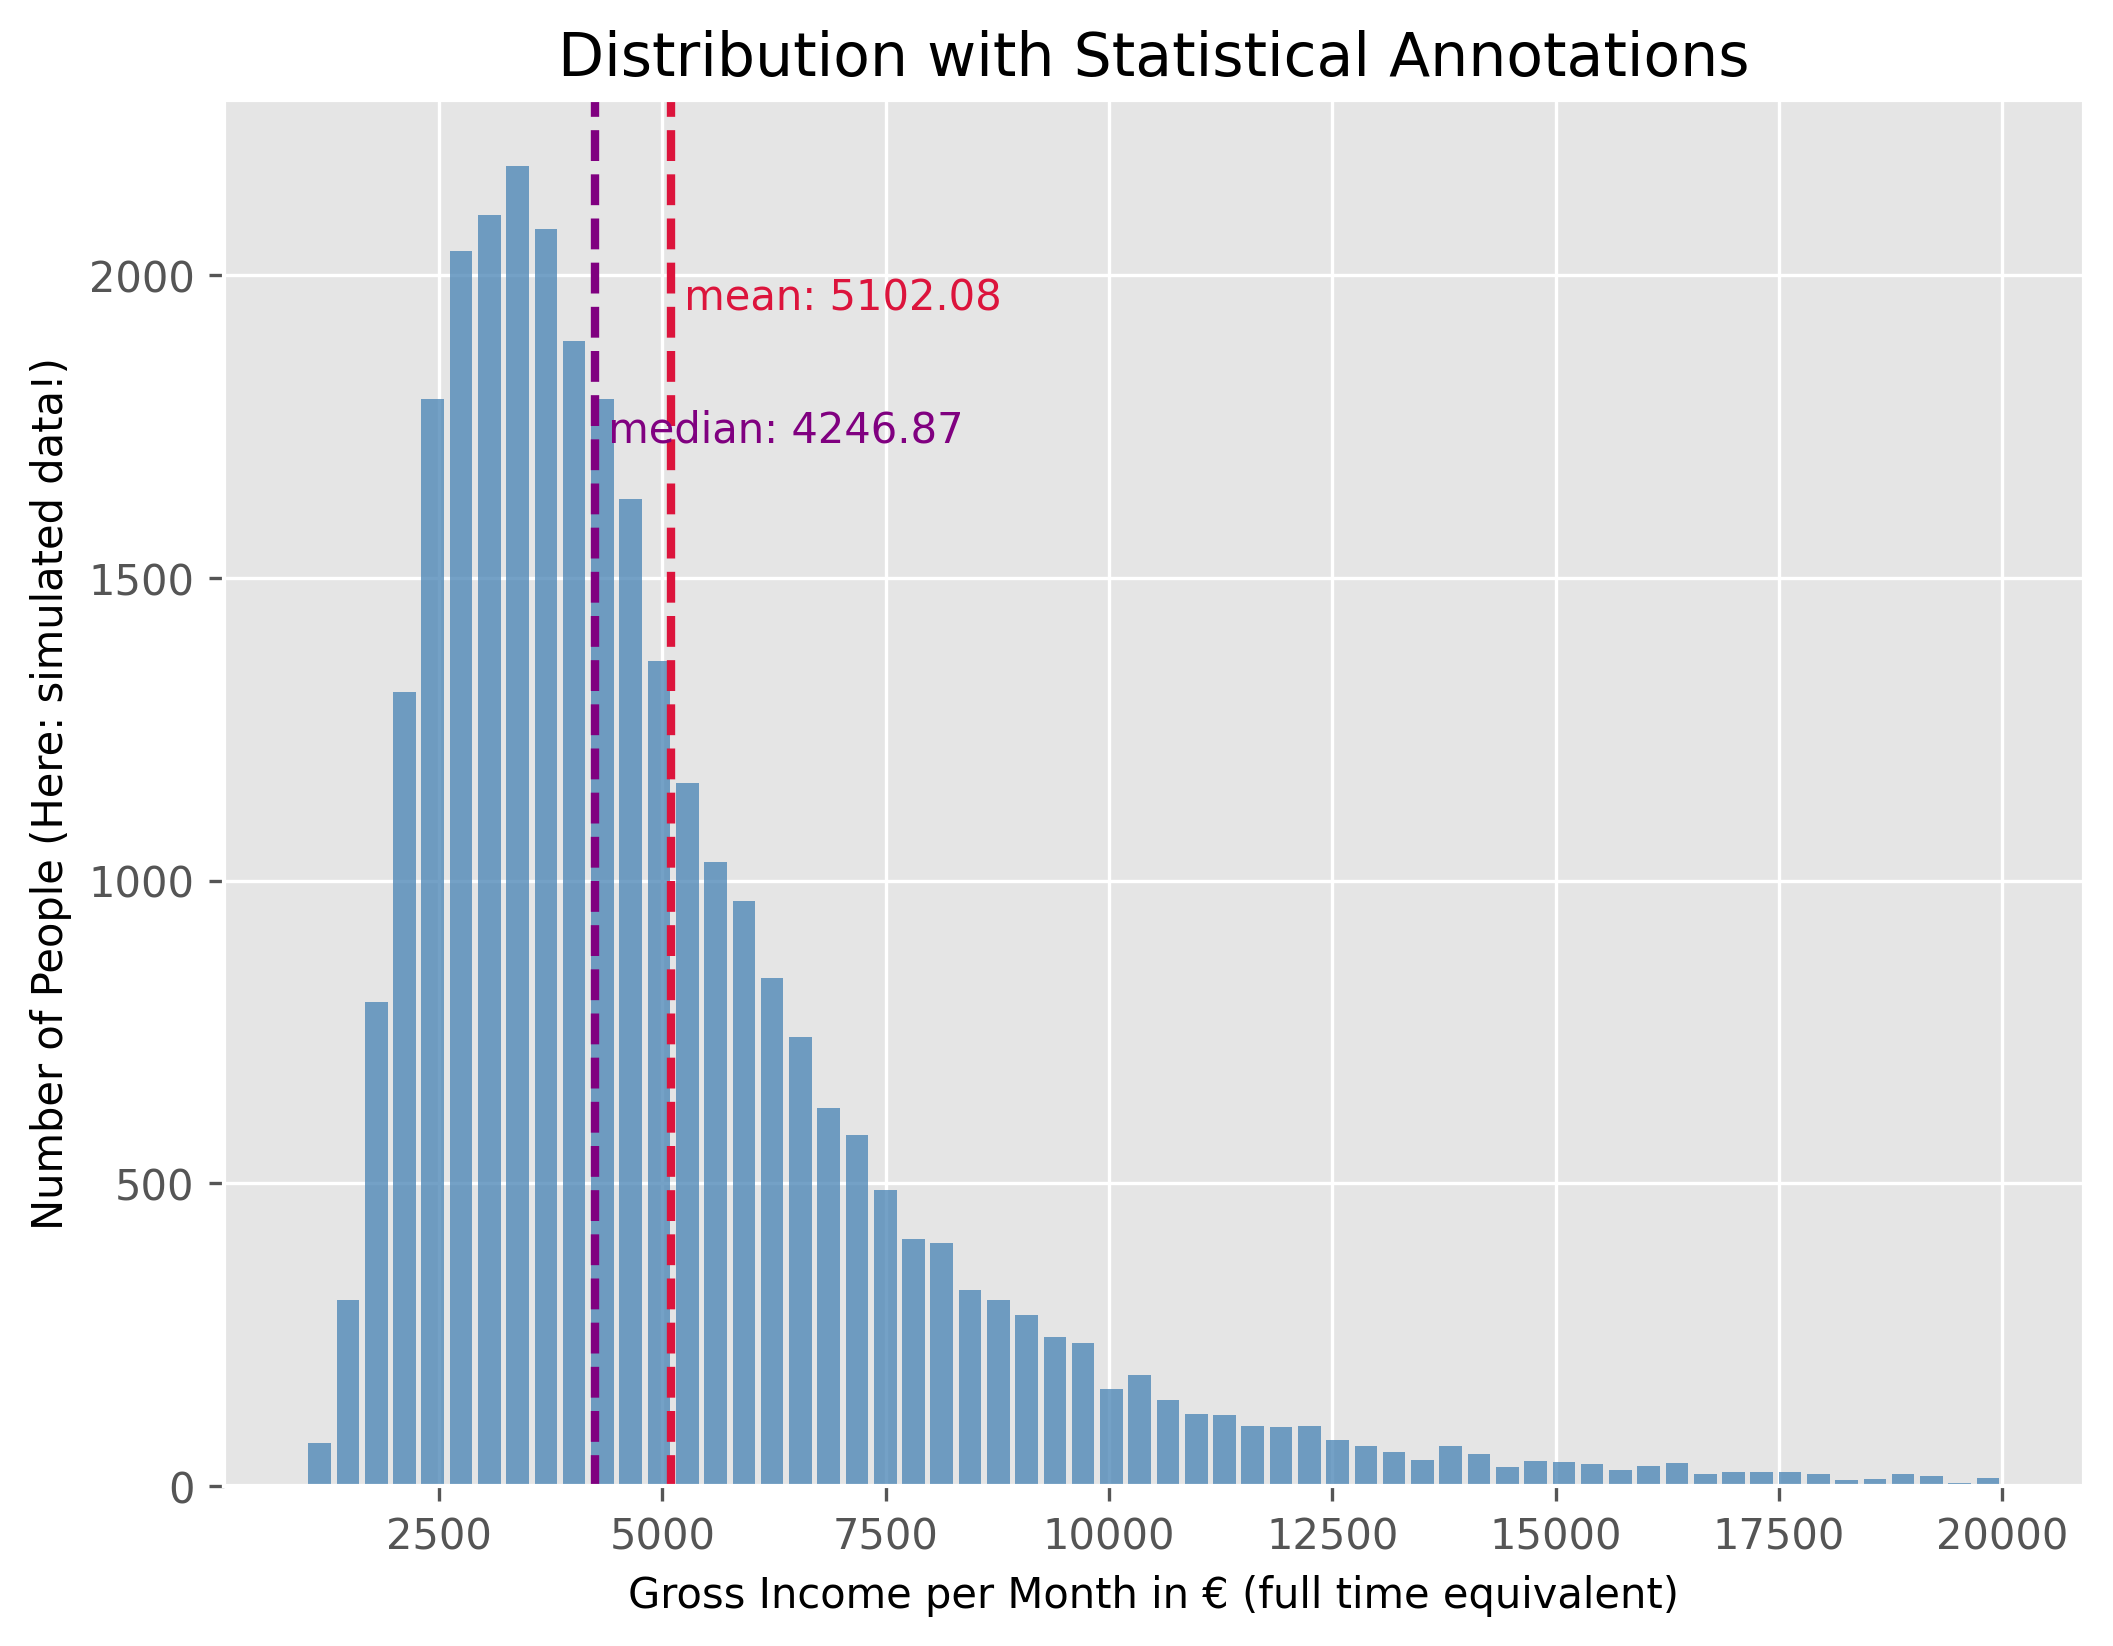

In [71]:
# The visualization will depict income ranges and their frequencies.
plot_dist(income_simulated["income"], 60, ["mean", "median"], upper_bound=20_000)
plt.ylabel("Number of People (Here: simulated data!)")
plt.xlabel("Gross Income per Month in € (full time equivalent)")
plt.show()

This data shows us the distribution of monthly gross incomes in full time equivalents (that means the income from a 50% job is scaled to a virtual 100% employment). As to be expected (or not?), this distribution is not symetric but represents a *right skewed distribution*. Typical for such matters, the distribution shows a very long tail towards the right which means that very *few* people fall into those ranges.

As a consequence, the mean and the median value are not identical. The median person, so the person for which 50% of the population have a lower and 50% a higher income has a gross monthly income of 3697.00€. But because some people have far higher incomes, thereby shifting the mean income to a higher value, here 4345.95€. Just as a reminder, this is fake data, but the actual values are very similar.

#### Boxplot and Violinplot
We have just seen before that there are different ways to visualize distributions. In addition to the *histogram plot* that we just did, we can also try to again use a *box plot* or *violin plot*.

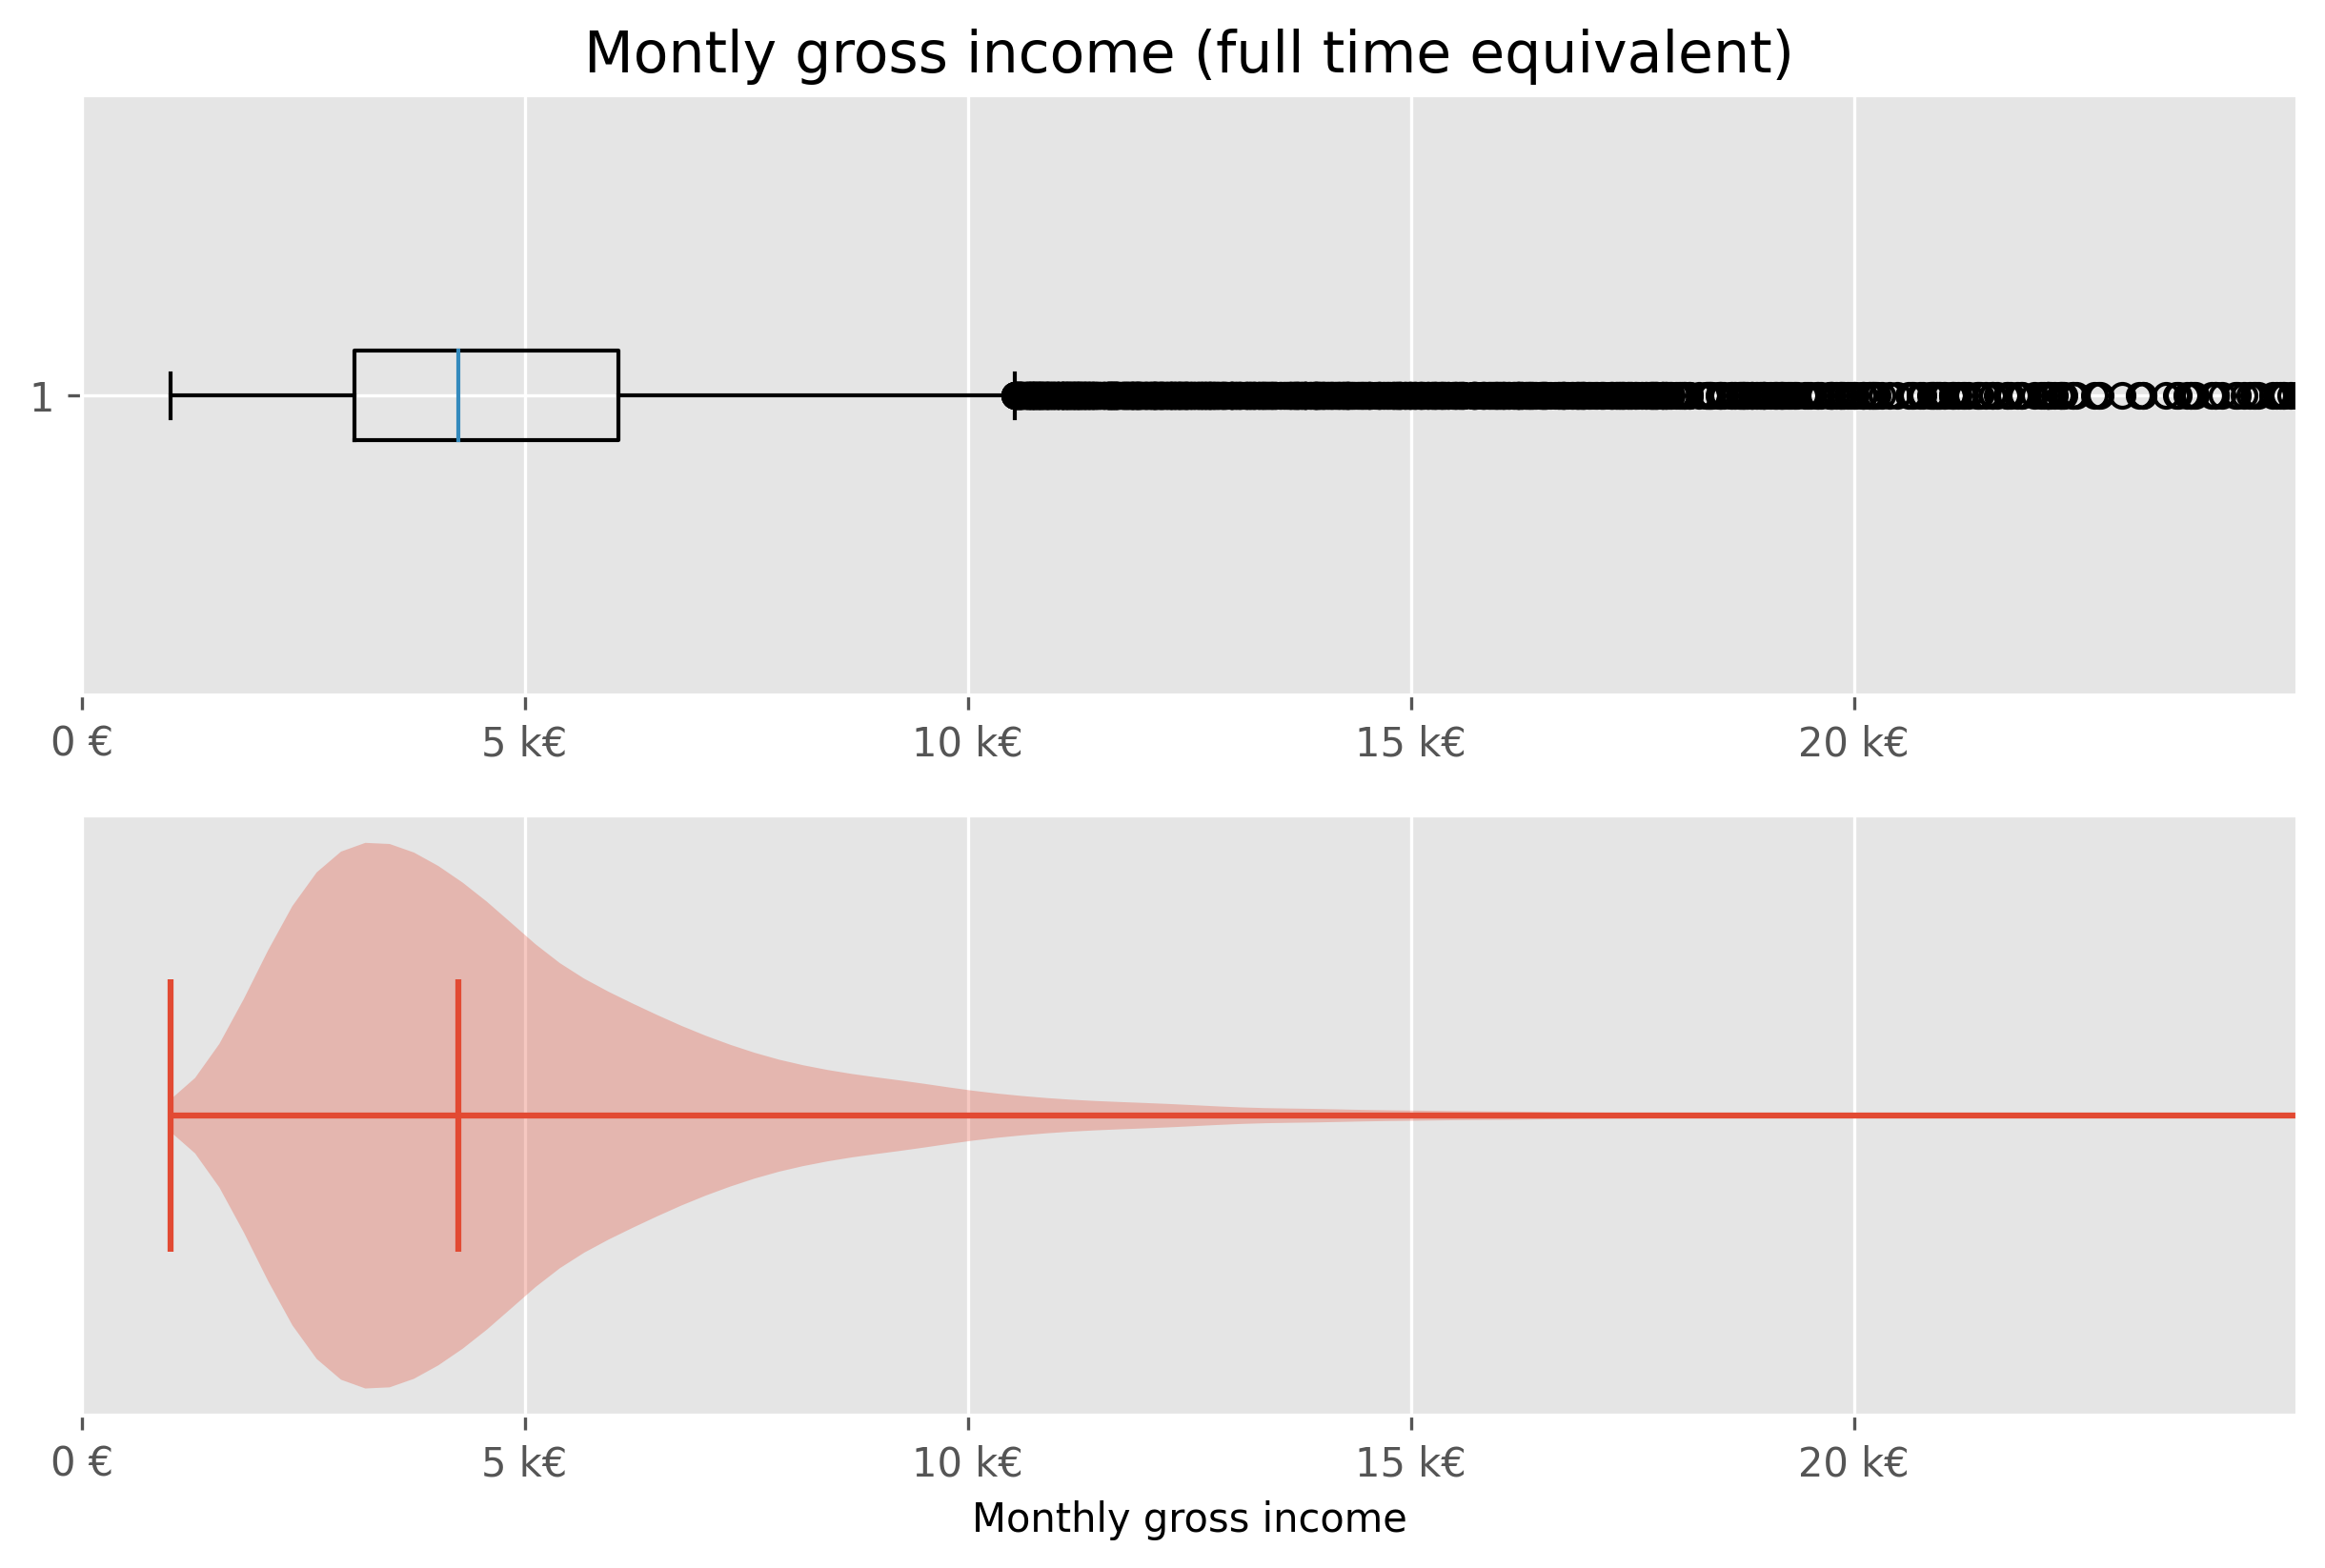

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), dpi=300)

axes[0].set_title("Montly gross income (full time equivalent)")

# Plot 1 - Boxplot
axes[0].boxplot(income_simulated["income"], vert=False)
axes[0].set_xlim(0, 25_000)
#axes[0].set_xlabel("Monthly gross income")
axes[0].set_xticks(ticks = [0, 5000, 1e4, 1.5e4, 2e4],
              labels=["0 €", "5 k€","10 k€", "15 k€", "20 k€"])

# Plot 2 - Violinplot
axes[1].violinplot(income_simulated["income"], vert=False,
                   points=300,
                   showmedians=True)
axes[1].set(yticks=[])
axes[1].set_xlim(0, 25_000)
axes[1].set_xlabel("Monthly gross income")
axes[1].set_xticks(ticks = [0, 5000, 1e4, 1.5e4, 2e4],
              labels=["0 €", "5 k€","10 k€", "15 k€", "20 k€"])

plt.show()

While both types of plots work from a technical point of few, they are not ideal in this situations. The main issue here is, that the largest part of the figure essential shows virtually nothing (violin plot), or nothing readable (box plot).

Specifically in cases like this, it is often helpful to work with percentiles (or deciles, quintiles...).

In [73]:
# Code to compute and display quantiles of the income data
income_simulated.quantile(q=np.arange(0, 1.1, 0.1))

income
0.0   1006.255725
0.1   2373.861561
0.2   2855.525998
0.3   3300.041225
0.4   3754.029141
0.5   4246.873834
0.6   4805.053876
0.7   5571.647346
0.8   6657.838879
0.9   8673.941902
1.0  83066.013547

We can further dissect this data by dividing it into deciles:

In [74]:
income_simulated["decile"] = pd.qcut(income_simulated['income'], q=10, labels=np.arange(10))
income_simulated.head()

income decile
0  4526.549108      5
1  5721.687026      7
2  4857.535724      6
3  4503.894796      5
4  3874.586358      4

Visualizing median income for each decile:

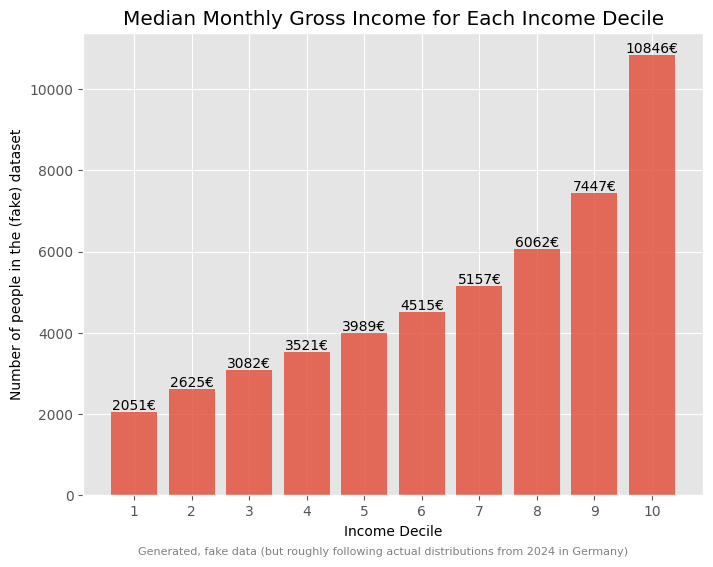

In [75]:
# Code to visualize the median income for each decile

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=np.arange(10), height=income_simulated.groupby("decile", observed=True).median()["income"],
       alpha=0.8,
      )
for i, v in enumerate(income_simulated.groupby("decile", observed=True).median()["income"]):
    ax.text(i, v + 50, f"{v:.0f}€", color='black', ha="center")

ax.set_xticks(ticks=np.arange(10), labels=np.arange(1,11), rotation=0)
ax.set_xlabel("Income Decile")
ax.set_ylabel("Number of people in the (fake) dataset")
ax.set_title("Median Monthly Gross Income for Each Income Decile")
fig.text(0.5, 0.01, "Generated, fake data (but roughly following actual distributions from 2024 in Germany)", 
         ha="center", fontsize=8, color="gray")

plt.show()

Such a breakdown offers more insights into the income disparities.

In [76]:
# Code to determine and display the total income for each decile
income_sum = income_simulated.groupby("decile", observed=True).sum()
income_sum["income"] *= 100 / income_sum["income"].sum()
income_sum

income
decile           
0        3.906335
1        5.134855
2        6.040360
3        6.903185
4        7.822355
5        8.857654
6       10.133147
7       11.925972
8       14.753187
9       24.522950

This can be further visualized using a *treemap* which is an alternative way to visualize fractions. 

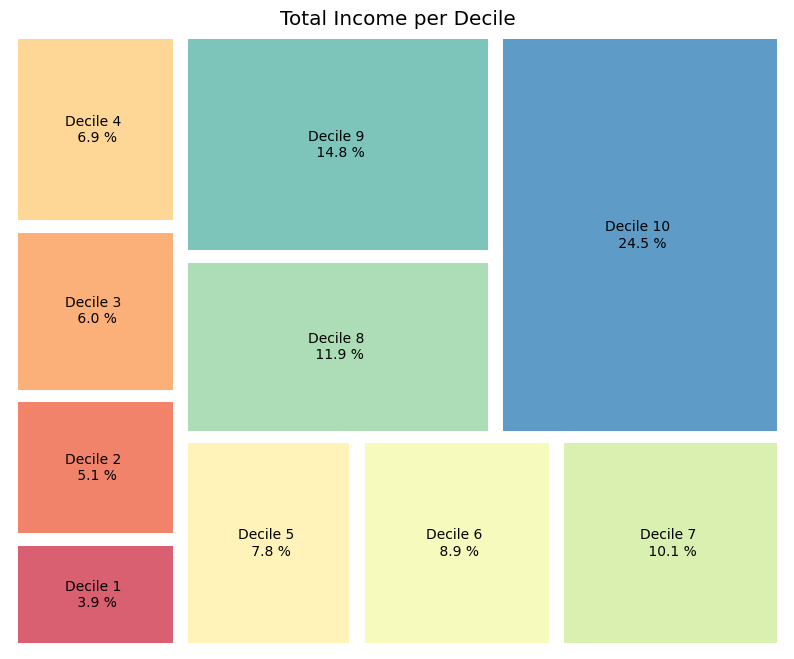

In [77]:
# Code to visualize the income distribution across deciles using a treemap

# labels
labels = [f"Decile {i+1} \n {x:.1f} %" for i, x in enumerate(income_sum["income"])]

# plot
fig, ax = plt.subplots(figsize=(10,8))
squarify.plot(sizes=income_sum['income'], label=labels, alpha=.8,
             color=sb.color_palette("Spectral", len(income_sum)), pad=2)
plt.axis('off')
plt.title("Total Income per Decile")
plt.show()


### Wealth

Typically, as the Piketty quote earlier on also said, wealth has a much more skewed distribution than income!

Here, we will again work with generated, but realistic, data.
The underlying distribution is from a 2021 census done by the "Bundesbank", the central bank of Germany (see [link to pdf](https://www.bundesbank.de/resource/blob/908138/5fa52fcaa9ad19972391d3c8c1bb82ce/mL/2023-04-vermoegensbefragung-data.pdf)).

While general trends typically agree, many specific numbers in such financial reports and datasets will vary greatly. This is caused by different methodologies. The Bundesbank data, for instance, is based on information received by about 5,000 randomly selected, voluntary participants. Give the very few super-rich people in the population, the group of the richtest people is likely underestimated/under-represented here. Also, people might judge their wealth too high or low.

In [29]:
distribution_germany_2021 = {
    "fraction": [5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5],
    "mean": [-700, 900, 6900, 18800, 43800, 106600, 185400, 297000, 430700, 725900, 1107000],
}
distribution_germany_2021 = pd.DataFrame(distribution_germany_2021)
distribution_germany_2021

fraction     mean
0          5     -700
1         10      900
2         10     6900
3         10    18800
4         10    43800
5         10   106600
6         10   185400
7         10   297000
8         10   430700
9         10   725900
10         5  1107000

In [30]:
def generate_wealth_data(data, total_entries):
    synthetic_data = []
    # Estimate standard deviation as a proportion of the mean
    data['std_dev'] = data['mean'].abs() / 2

    for _, row in data.iterrows():
        count = int((row['fraction'] / 100) * total_entries)
        if count > 0:
            # Generate data for this class
            generated = np.random.normal(loc=row['mean'], scale=row['std_dev'], size=count)
            synthetic_data.extend(generated)

    # In case the sum of fractions does not exactly match 100% due to rounding,
    # ensure the synthetic data length matches the desired total_entries
    synthetic_data = np.random.choice(synthetic_data, total_entries, replace=True)

    return synthetic_data

# Generating synthetic wealth data
synthetic_wealth_data = generate_wealth_data(distribution_germany_2021, 30000)

In [31]:
correction_term_heuristic = 1.4
wealth_data = pd.DataFrame(synthetic_wealth_data * correction_term_heuristic,
                           columns=["wealth"])

In [32]:
wealth_data.describe()

wealth
count  3.000000e+04
mean   3.369832e+05
std    5.051141e+05
min   -1.265848e+06
25%    1.148218e+04
50%    1.090483e+05
75%    4.619638e+05
max    4.021738e+06

Such wealth distributions, particularly when skewed, might be challenging to interpret directly. Different visual representations can offer distinct perspectives:

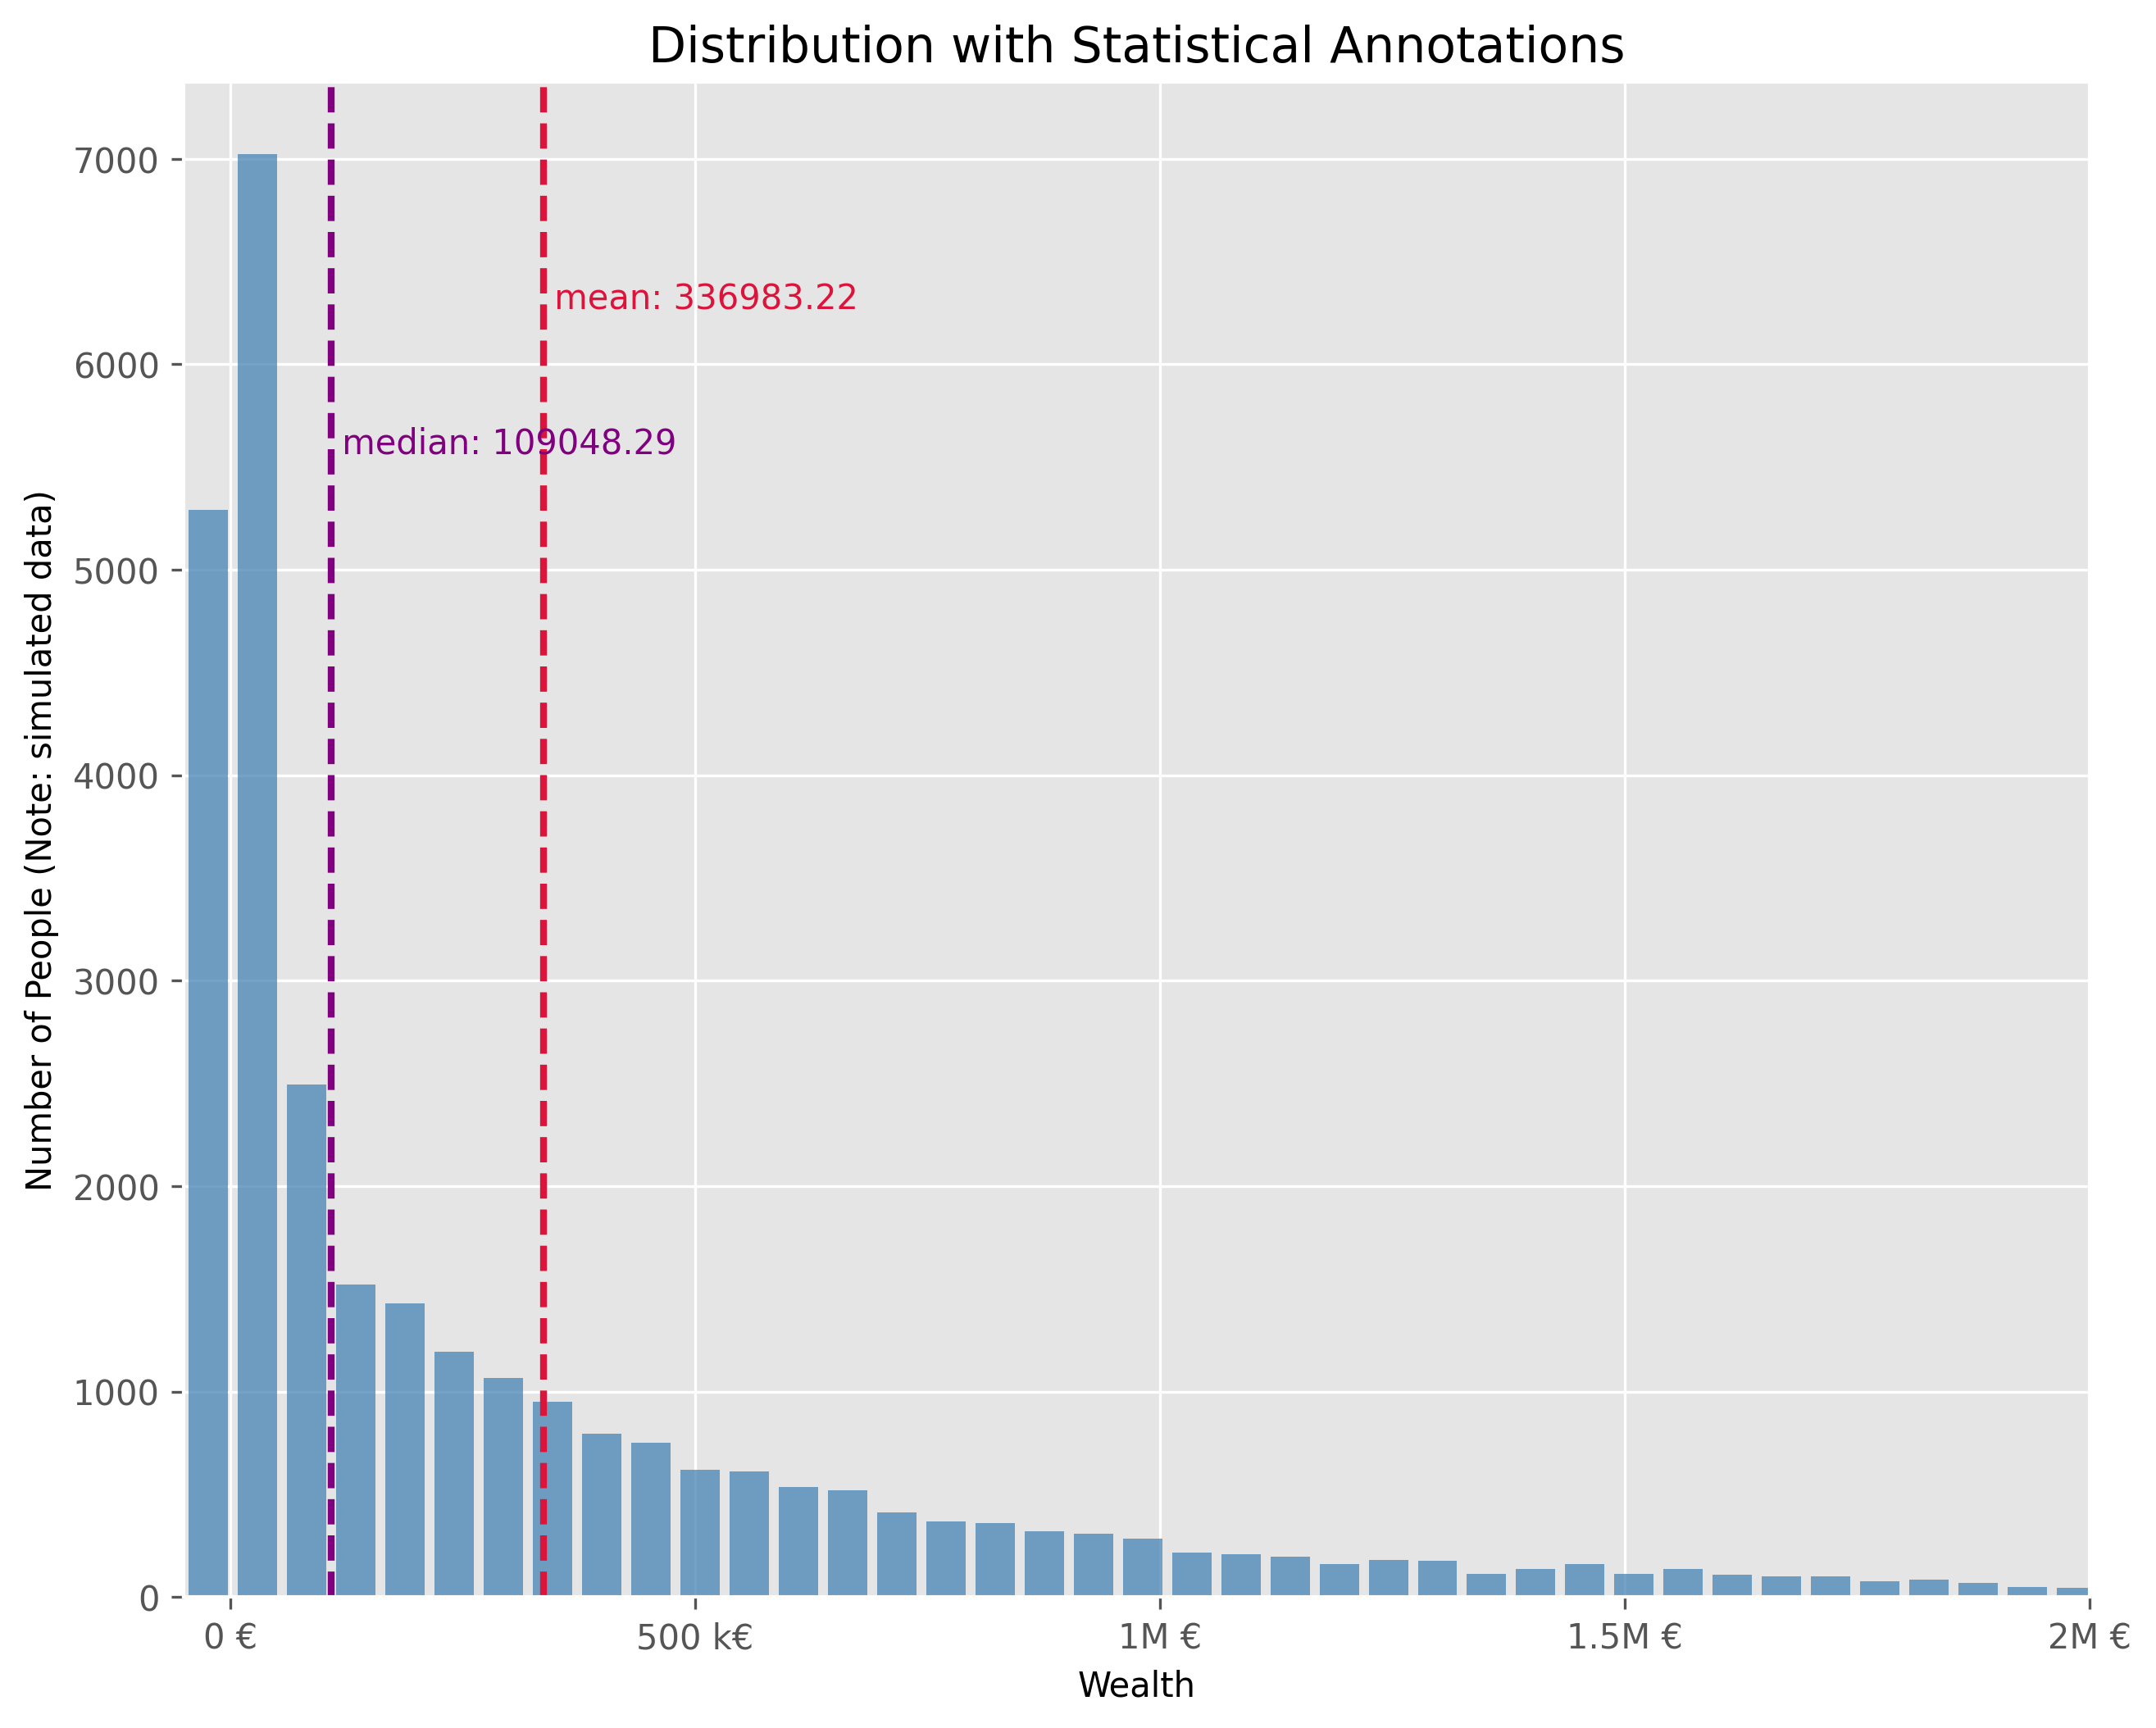

In [33]:
plot_dist(wealth_data["wealth"], 100, ["mean", "median"], figsize=(10,8))
plt.xlim(-50000, 2e6)
plt.xlabel("Wealth")
plt.ylabel("Number of People (Note: simulated data)")
plt.xticks(ticks = [0, 5e5, 1e6, 1.5e6, 2e6], labels=["0 €", "500 k€",
                                                     "1M €", "1.5M €", "2M €"])
plt.show()

This plot is technically OK. But is has a number of disadvantages. It is visually very centered on the left side due to the strong asymmetry in the wealth distribution. This also leads to the fact, that the *long tail*, that is all the fortunes above > 500k€ are practically impossible to read in this plot. We can try different plot types.

We will quickly see, that neither a **box plot** nor a **violin plot** is not making things better here:

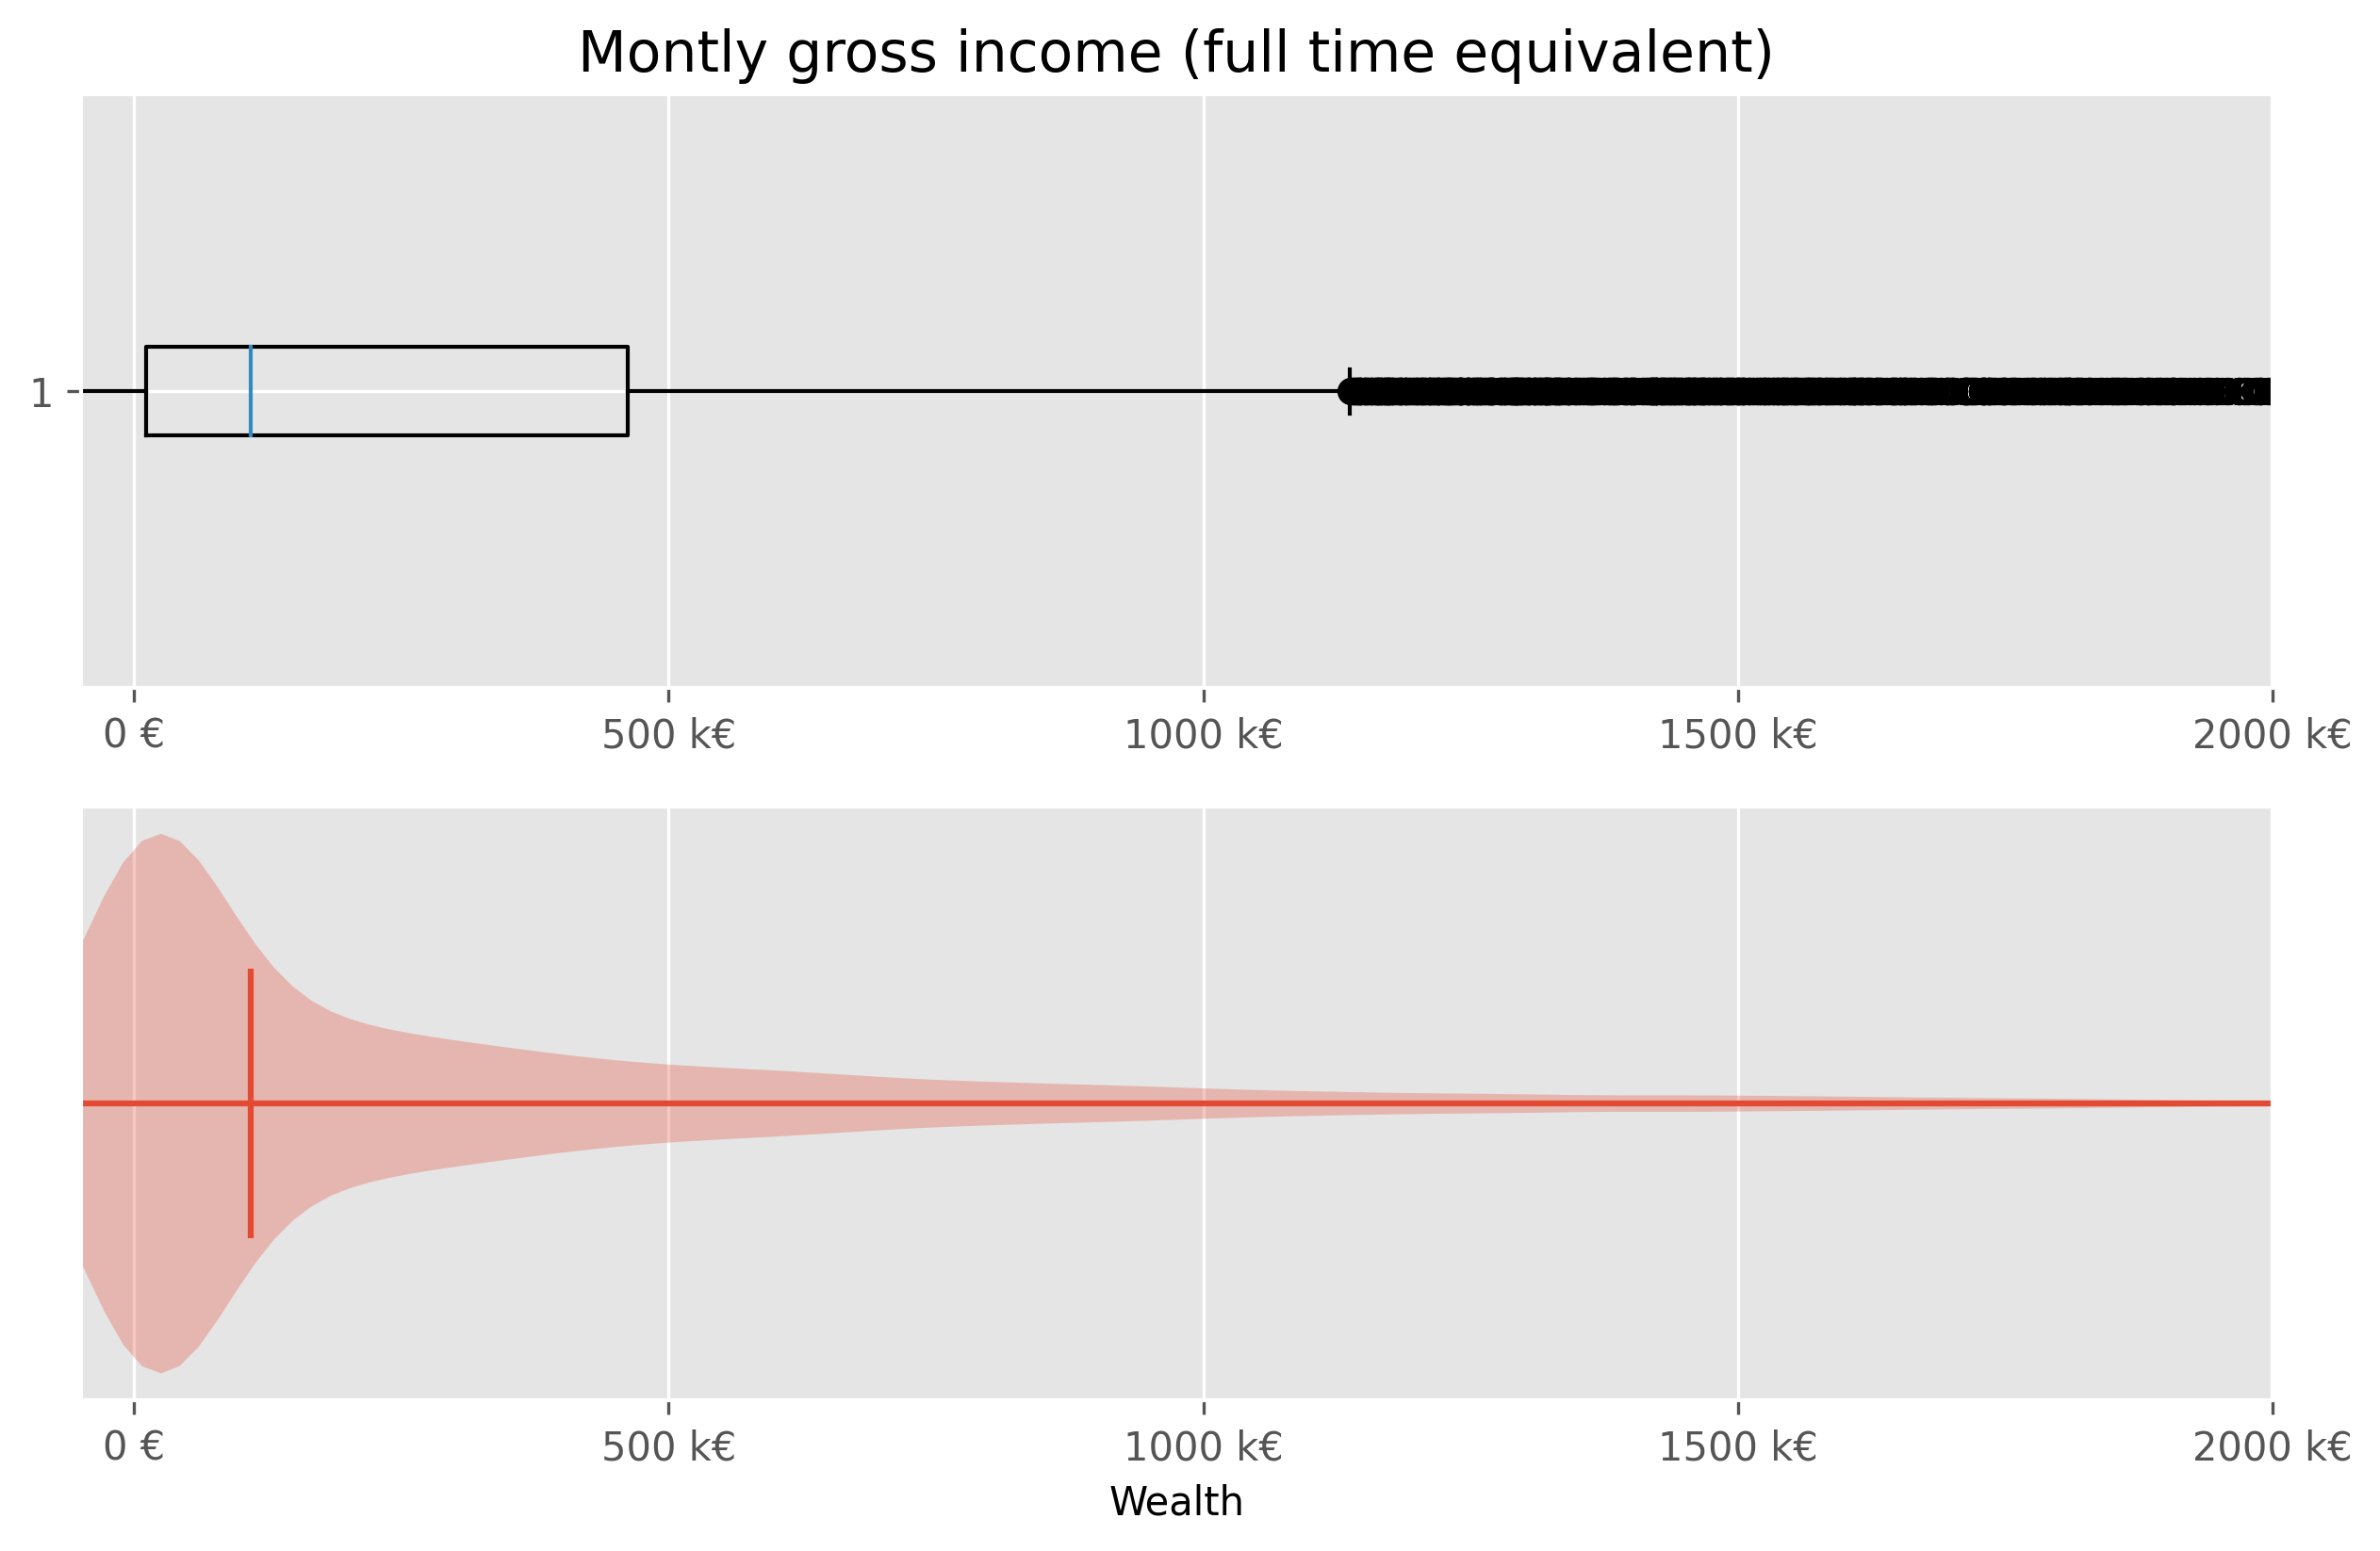

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), dpi=300)

axes[0].set_title("Montly gross income (full time equivalent)")

# Plot 1 - Boxplot
axes[0].boxplot(wealth_data["wealth"], vert=False)
axes[0].set_xlim(-50000, 2e6)
axes[0].set_xticks(ticks = [0, 5e5, 1e6, 1.5e6, 2e6],
              labels=["0 €", "500 k€","1000 k€", "1500 k€", "2000 k€"])

# Plot 2 - Violinplot
axes[1].violinplot(wealth_data["wealth"], vert=False,
                   points=300,
                   showmedians=True)
axes[1].set(yticks=[])
axes[1].set_xlim(-50000, 2e6)
axes[1].set_xlabel("Wealth")
axes[1].set_xticks(ticks = [0, 5e5, 1e6, 1.5e6, 2e6],
              labels=["0 €", "500 k€","1000 k€", "1500 k€", "2000 k€"])

plt.show()

Sometimes it helps to switch from a linear to a logarithmic scale. Not in this case though:

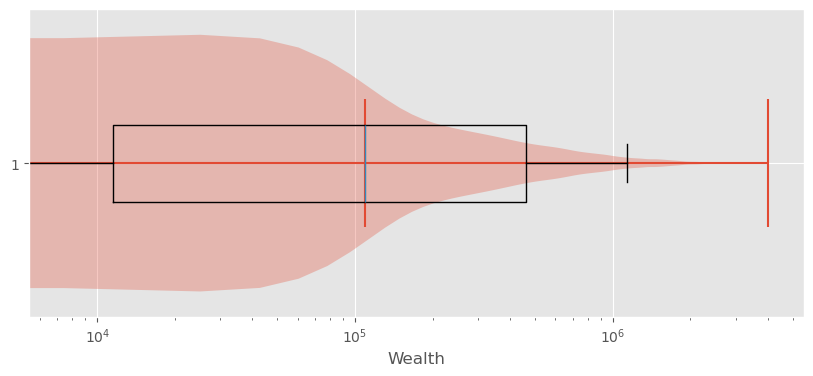

In [30]:
fig, ax = plt.subplots(figsize=(10,4))
ax.violinplot(wealth_data["wealth"], vert=False, points=300,
             showmedians=True)
ax.boxplot(wealth_data["wealth"], vert=False, showfliers=False)
ax.set_ylim(0.7, 1.3)
ax.set_xlabel("Wealth")
ax.set_xticks(ticks = [0, 5e5, 1e6, 1.5e6, 2e6],
              labels=["0 €", "500 k€", "1000 k€", "1500 k€", "2000 k€"])
ax.set_xscale("log")
plt.show()

### Exploring Wealth Distribution: A Different Approach

Analyzing wealth distribution can be quite abstract due to the vast range of values we might encounter. Even switching to non-linear scales is not overly satisfying here. Here, two difficulties come together. First, the distribution is heavily skewed and second, wealth can also take negative values (unfortunately for many...).

Just as with the incomes, one effective way to dissect this vastness is by segmenting it into more digestible chunks – like deciles.

In principle, this could be computed via  
`wealth_data["decile"] = pd.qcut(wealth_data['wealth'], q=10, labels=np.arange(10))`  
But to avoid using the simulated data, we can use actual data at this point.

In [31]:
wealth_germany_2021_eu_data = {
    "fraction": [20, 20, 20, 20, 10, 10],  # Fraction of population in each class
    "mean_wealth": [-3.1, 21.1, 106.4, 300.7, 553.5, 1757.8]  # Mean wealth in thousand euros
}
wealth_germany_2021_eu_data = pd.DataFrame(wealth_germany_2021_eu_data)
wealth_germany_2021_eu_data.mean_wealth *= 1000
wealth_germany_2021_eu_data

fraction  mean_wealth
0        20      -3100.0
1        20      21100.0
2        20     106400.0
3        20     300700.0
4        10     553500.0
5        10    1757800.0

Such data (percentiles, deciles etc.) can often be plotted fairly well as a bar plot.

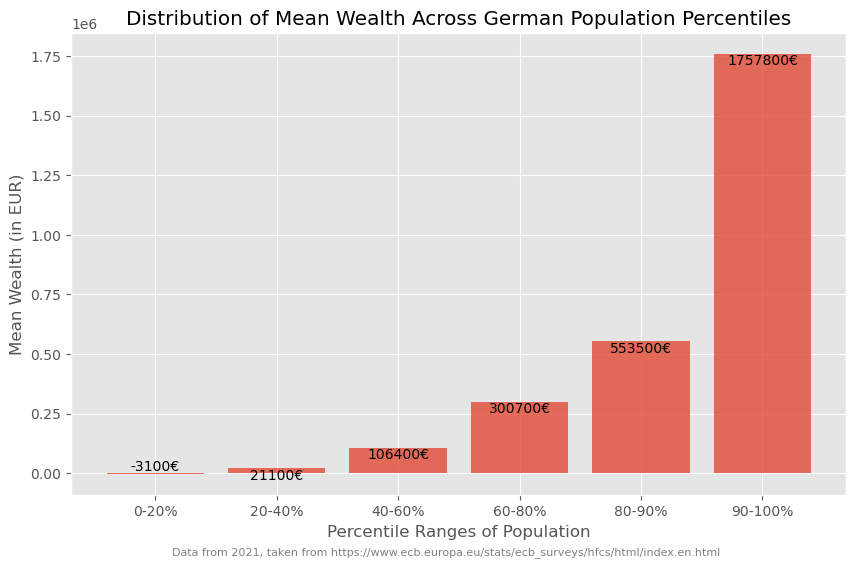

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
bars = ax.bar(wealth_germany_2021_eu_data.index,
              wealth_germany_2021_eu_data["mean_wealth"],
              alpha=0.8,
              )

# Annotate the actual wealth mean values above each bar
for bar, wealth in zip(bars, wealth_germany_2021_eu_data["mean_wealth"]):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{wealth:.0f}€", ha='center', va='bottom' if yval < 0 else 'top')

# Set labels and title
ax.set_xlabel("Percentile Ranges of Population")
ax.set_ylabel("Mean Wealth (in EUR)")
ax.set_title("Distribution of Mean Wealth Across German Population Percentiles")

# Set custom x-axis labels to show percentile ranges
percentiles = ["0-20%", "20-40%", "40-60%", "60-80%", "80-90%", "90-100%"]
ax.set_xticks(wealth_germany_2021_eu_data.index)
ax.set_xticklabels(percentiles)

# Show grid
ax.grid(True)

fig.text(0.5, 0.01, "Data from 2021, taken from https://www.ecb.europa.eu/stats/ecb_surveys/hfcs/html/index.en.html", 
         ha="center", fontsize=8, color="gray")

# Show the plot
plt.show()

But if we wish to amplify the impact of these insights visually, we can take a more graphical approach. This can, for instance be done using a so called *treemap plot*.

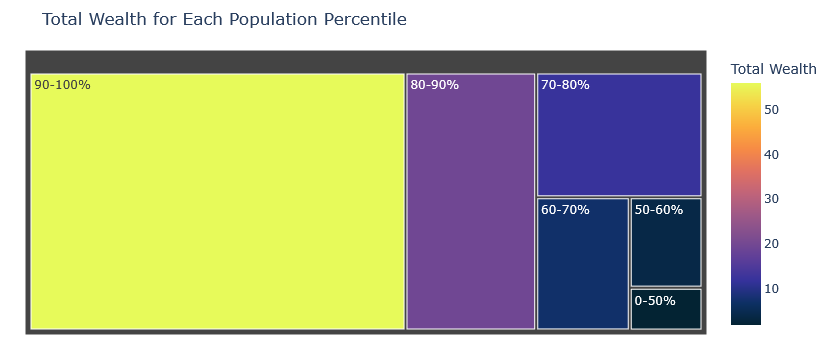

In [33]:
import plotly.express as px

# Data preparted for treemap plot
data = pd.DataFrame({
    'Percentile': ['0-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'],
    'Total Wealth': [1.8, 3.8, 7.2, 12., 19.5, 56.1],
})

# Creating the treemap
fig = px.treemap(data, 
                 path=['Percentile'], 
                 values='Total Wealth',
                 color='Total Wealth',
                 color_continuous_scale='thermal',
                 title="Total Wealth for Each Population Percentile")

# Display the figure
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


This visualization provides an illustrative look at how wealth is dispersed across different segments of society. Through such visual aids, abstract numbers transform into tangible insights. And I bet they help a lot in sparking discussions on the distribution of wealth...

## Significance and Distributions in Statistics
We have seen that there are essential basic statistical measures that can be helpful for a first exploration, but should be handled with care because they might make things look *too easy*.

And, we have also seen that we often have to know how to pick the right statistical measures to answer our question. And the right data visualizations to highlight the essential aspects of our data and to tell the stories we want to tell based on the data we have.

In this section, we will briefly touch on the concepts of **statistical significance** and **probability distributions**, which are often key to uncovering the stories hidden within data. These concepts are often indispensable for a solid interpretation of our data analysis.

Imagine being able to predict trends, detect anomalies, and make informed decisions with confidence. That’s the promise of understanding statistical distributions: they provide a structured way to visualize data variability, understand randomness, and capture the likelihood of different outcomes.

### Generating and Visualizing Hypothetical Data

To explore these concepts, we start by generating hypothetical (but somewhat realistic) data representing IQ scores. These data sets will help us understand how data distributions work and how statistical measures can be applied.

In [4]:
# Creating a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(seed=0)

# Generating a large dataset of IQ scores centered around the mean of 100 with a standard deviation of 15
data_iq_large = rng.normal(100, 15, 100000)

# Generating a smaller dataset for a specific group from Düsseldorf
data_iq_duesseldorf = rng.normal(110, 15, 50)

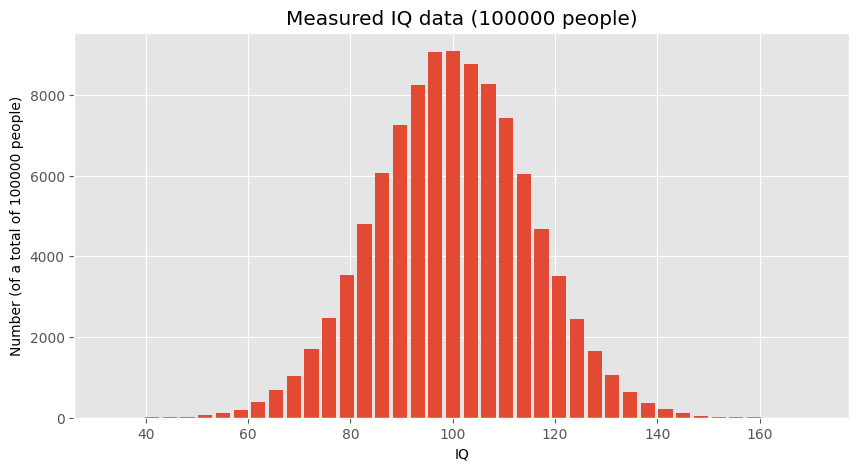

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data_iq_large, 40, rwidth=0.8)
ax.set_title("IQs")
ax.set_xlabel("IQ")
ax.set_ylabel(f"Number (of a total of {len(data_iq_large)} people)")
ax.set_title(f"Measured IQ data ({len(data_iq_large)} people)")

#plt.savefig("example_statistics_iq_distribution.png", dpi=300)
plt.show()

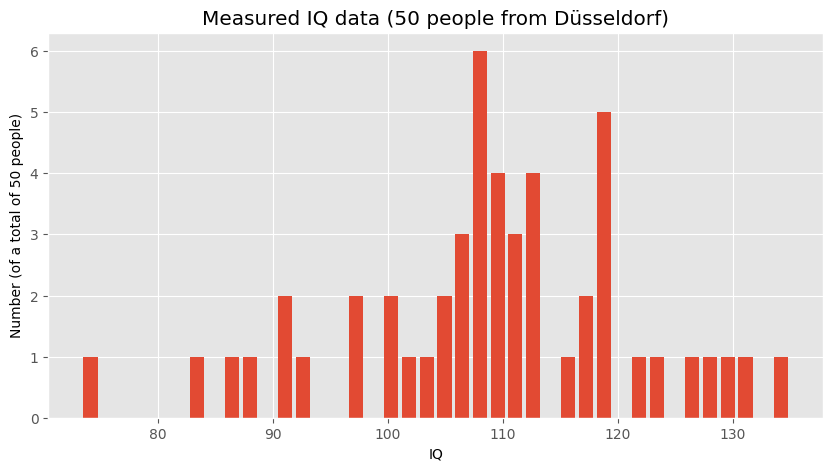

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data_iq_duesseldorf, 40, rwidth=0.8)
ax.set_title("IQs")
ax.set_xlabel("IQ")
ax.set_ylabel(f"Number (of a total of {len(data_iq_duesseldorf)} people)")
ax.set_title(f"Measured IQ data ({len(data_iq_duesseldorf)} people from Düsseldorf)")

#plt.savefig("example_statistics_iq_distribution.png", dpi=300)
plt.show()

**Analyzing the Data**  
After visualizing, the next step is to analyze the statistical measures:

In [7]:
print(f"Mean IQ (large dataset): {np.mean(data_iq_large)}")
print(f"Mean IQ (Düsseldorf): {np.mean(data_iq_duesseldorf)}")

Mean IQ (large dataset): 99.9863762384032
Mean IQ (Düsseldorf): 108.9020908464346


These calculations provide the mean IQ for both datasets, which can then be compared to draw preliminary conclusions about the differences between the general population and the subgroup from Düsseldorf.

### Hypothesis Testing

To formally address whether the observed difference in mean IQs between the general population and the Düsseldorf subgroup is statistically significant, we can employ hypothesis testing. This means that we start from a question or hypothesis which in this case could be:

**People in Düsseldorf smarter than the overall average? (given the data shown above)**

The underlying question is if the difference in mean IQ that we just computed is a reliable indicator for making such a bold statement or whether such a difference could also just be a mere coincidence. What do you think?


### Student-t-test

One way to answer this question is to perform a statistical test such as a **t-test** to compare the means of the two distributions. We here assume that you have heard of the *student t-test*, if not, you will easily find plenty of introduction material elsewhere (e.g., [on Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)). The null hypothesis (H0) would state that there is no difference in IQ between the general population and those from Düsseldorf, whereas the alternative hypothesis (H1) would suggest that there is a significant difference.

By conducting this test, we can determine whether the observed difference in means is likely due to random variation or if it's statistically significant, thereby suggesting that individuals from Düsseldorf might indeed have a higher average IQ compared to the general population.

For our hypothesis testing, we'll use the two-sample t-test because we are comparing the means from two independent samples. This test will help us understand if the differences in the means are significant or just due to random chance.

Here is the Python code that implements the t-test using the SciPy library, which provides the `ttest_ind` function specifically for this purpose:

In [8]:
# Importing the necessary function from scipy.stats
from scipy.stats import ttest_ind

# Conducting the t-test between the large dataset and the Düsseldorf dataset
t_stat, p_value = ttest_ind(data_iq_large, data_iq_duesseldorf)

# Output the results of the t-test
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -4.201608996012756
P-Value: 2.6525398189088037e-05


#### Interpreting the T-Test Results

The output of this test gives us two key pieces of information:

- **T-Statistic**: This value indicates the relative difference between the means in terms of the combined standard deviation of the two samples.
- **P-Value**: This value is the probability of obtaining results that are a least as extreme as the result actually observed, under the assumption that the null hypothesis is indeed correct. The lower this number is, the less likely it becomes to obtain such a result *by chance*.

In the present scenario we observe a **very low p-value** which here would mean that we probably have to reject the null hypothesis. Or, in other words, it is extremely unlikely to observe such a big IQ discrepency merely by chance.

An alternative approach would be a **permutation test**.

### Permutation Testing

Permutation tests are a type of non-parametric statistical test that do not rely on assumptions about the distribution of the data. They are used to determine whether the observed differences between two groups could be due to chance. In this section, we'll apply a permutation test to the IQ data to provide another perspective on the question of whether there is a significant difference in IQ scores between the general population and the Düsseldorf subgroup.
Implementing the Permutation Test

The following Python code defines a function to perform permutation testing by randomly sampling the data, and then it carries out the test multiple times to create a distribution of the differences in means:

In [9]:
def permutation_distance(data, n_samples):
    """Calculate the difference in means between the original data and a random subset."""
    return data.mean() - np.random.choice(data, n_samples).mean()

# Generating permutation experiments
permutation_experiments = [permutation_distance(data_iq_large, 50) for _ in range(10000)]

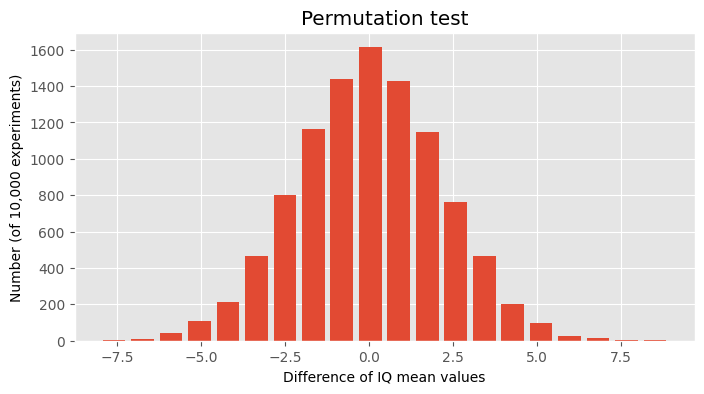

In [10]:
# Plotting the results of the permutation experiments
fig, ax = plt.subplots(figsize=(8, 4))

ax.hist(permutation_experiments, 20, rwidth=0.8)
ax.set_title("Permutation test")
ax.set_xlabel("Difference of IQ mean values")
ax.set_ylabel("Number (of 10,000 experiments)")
plt.show()

#### Discussion of the Permutation Test Results

The histogram created by this code represents the distribution of the differences in means from 10,000 permutation tests, where the mean difference is calculated between the full dataset's mean and the means of random samples of size 50 (the size of the Düsseldorf sample).

In the data shown above, we observed an differnce of the IQ mean values of about 10 points. In this statistical experiment we see how unlikely such a result would be if we would simply draw 50 people randomly from a normal IQ distribution with a mean of 100. It is not entirely impossible, but **extremely unlikely** to happen. Usually this means that we will refuse the hypothesis that said that both datasets come from the same distribution.

### Conclusion
Given the data we see here, we will have to conclude that the measured subset of 50 people from Düsseldorf indeed has a **significantly higher IQ** than the overall distribution with a mean value of 100!


Disclaimer:
As much as people living in Düsseldorf might want to belive this result, all data used in this notebook is just toy data ;)

## More on Basic Statistics for Data Science
Here we only covered a few of the ultimate basics. There is a lot more to learn and discover in the field of statistics when it comes to working in data science. And, just so you know: I have never met a data scientist who complained that he/she had spent too much time learning about statistics (a complaint the other way around is fairly common though...).

So, here are three (out of *many*) suitable textbooks on this matter:
- David Lane, "Introduction to Statistics", {cite}`lane_statistics_2003`, https://open.umn.edu/opentextbooks/textbooks/459
- Peter Bruce and Andrew Bruce, "Practical Statistics for Data Scientists", 2017, {cite}`bruce_statistics_2017`
- Stanley Chan, "Introduction to Probability for Data Science", 2021, {cite}`chan2021probability`